In [1]:
import csv
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from scipy import stats

np.random.seed(0)

In [142]:
filename = "NuclearPowerAccidents2016.csv"


costs = []
Adate = dt.datetime(1979, 3, 28)
 
with open(filename, 'r') as csvfile:
    csvreader = list(csv.reader(csvfile))
    for row in csvreader[1:]:
        D = row[0].split('/')
        date = dt.datetime(int(D[2]), int(D[0]), int(D[1])) 
        r = row[2]
        if(r != '' and date < Adate):
            costs.append(float(r))
print("Ensemble des couts en millions de dollards: \n" + str(costs) + "\nNombre d'observations : " + str(len(costs)))  

Ensemble des couts en millions de dollards: 
[8189.0, 4400.0, 3500.0, 2900.0, 2500.0, 1964.5, 1900.0, 1733.4, 1500.0, 1330.0, 1300.0, 1100.0, 1100.0, 990.0, 800.0, 793.9, 788.4, 541.4, 511.5, 425.2, 277.1, 180.0, 150.0, 100.0, 100.0, 99.5, 98.0, 89.9, 87.7, 84.5, 77.0, 60.1, 52.4, 38.0, 37.5, 25.7, 25.7, 17.1, 16.1, 15.0, 13.9, 11.8, 11.4, 6.1, 4.4, 1.2, 1.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Nombre d'observations : 55


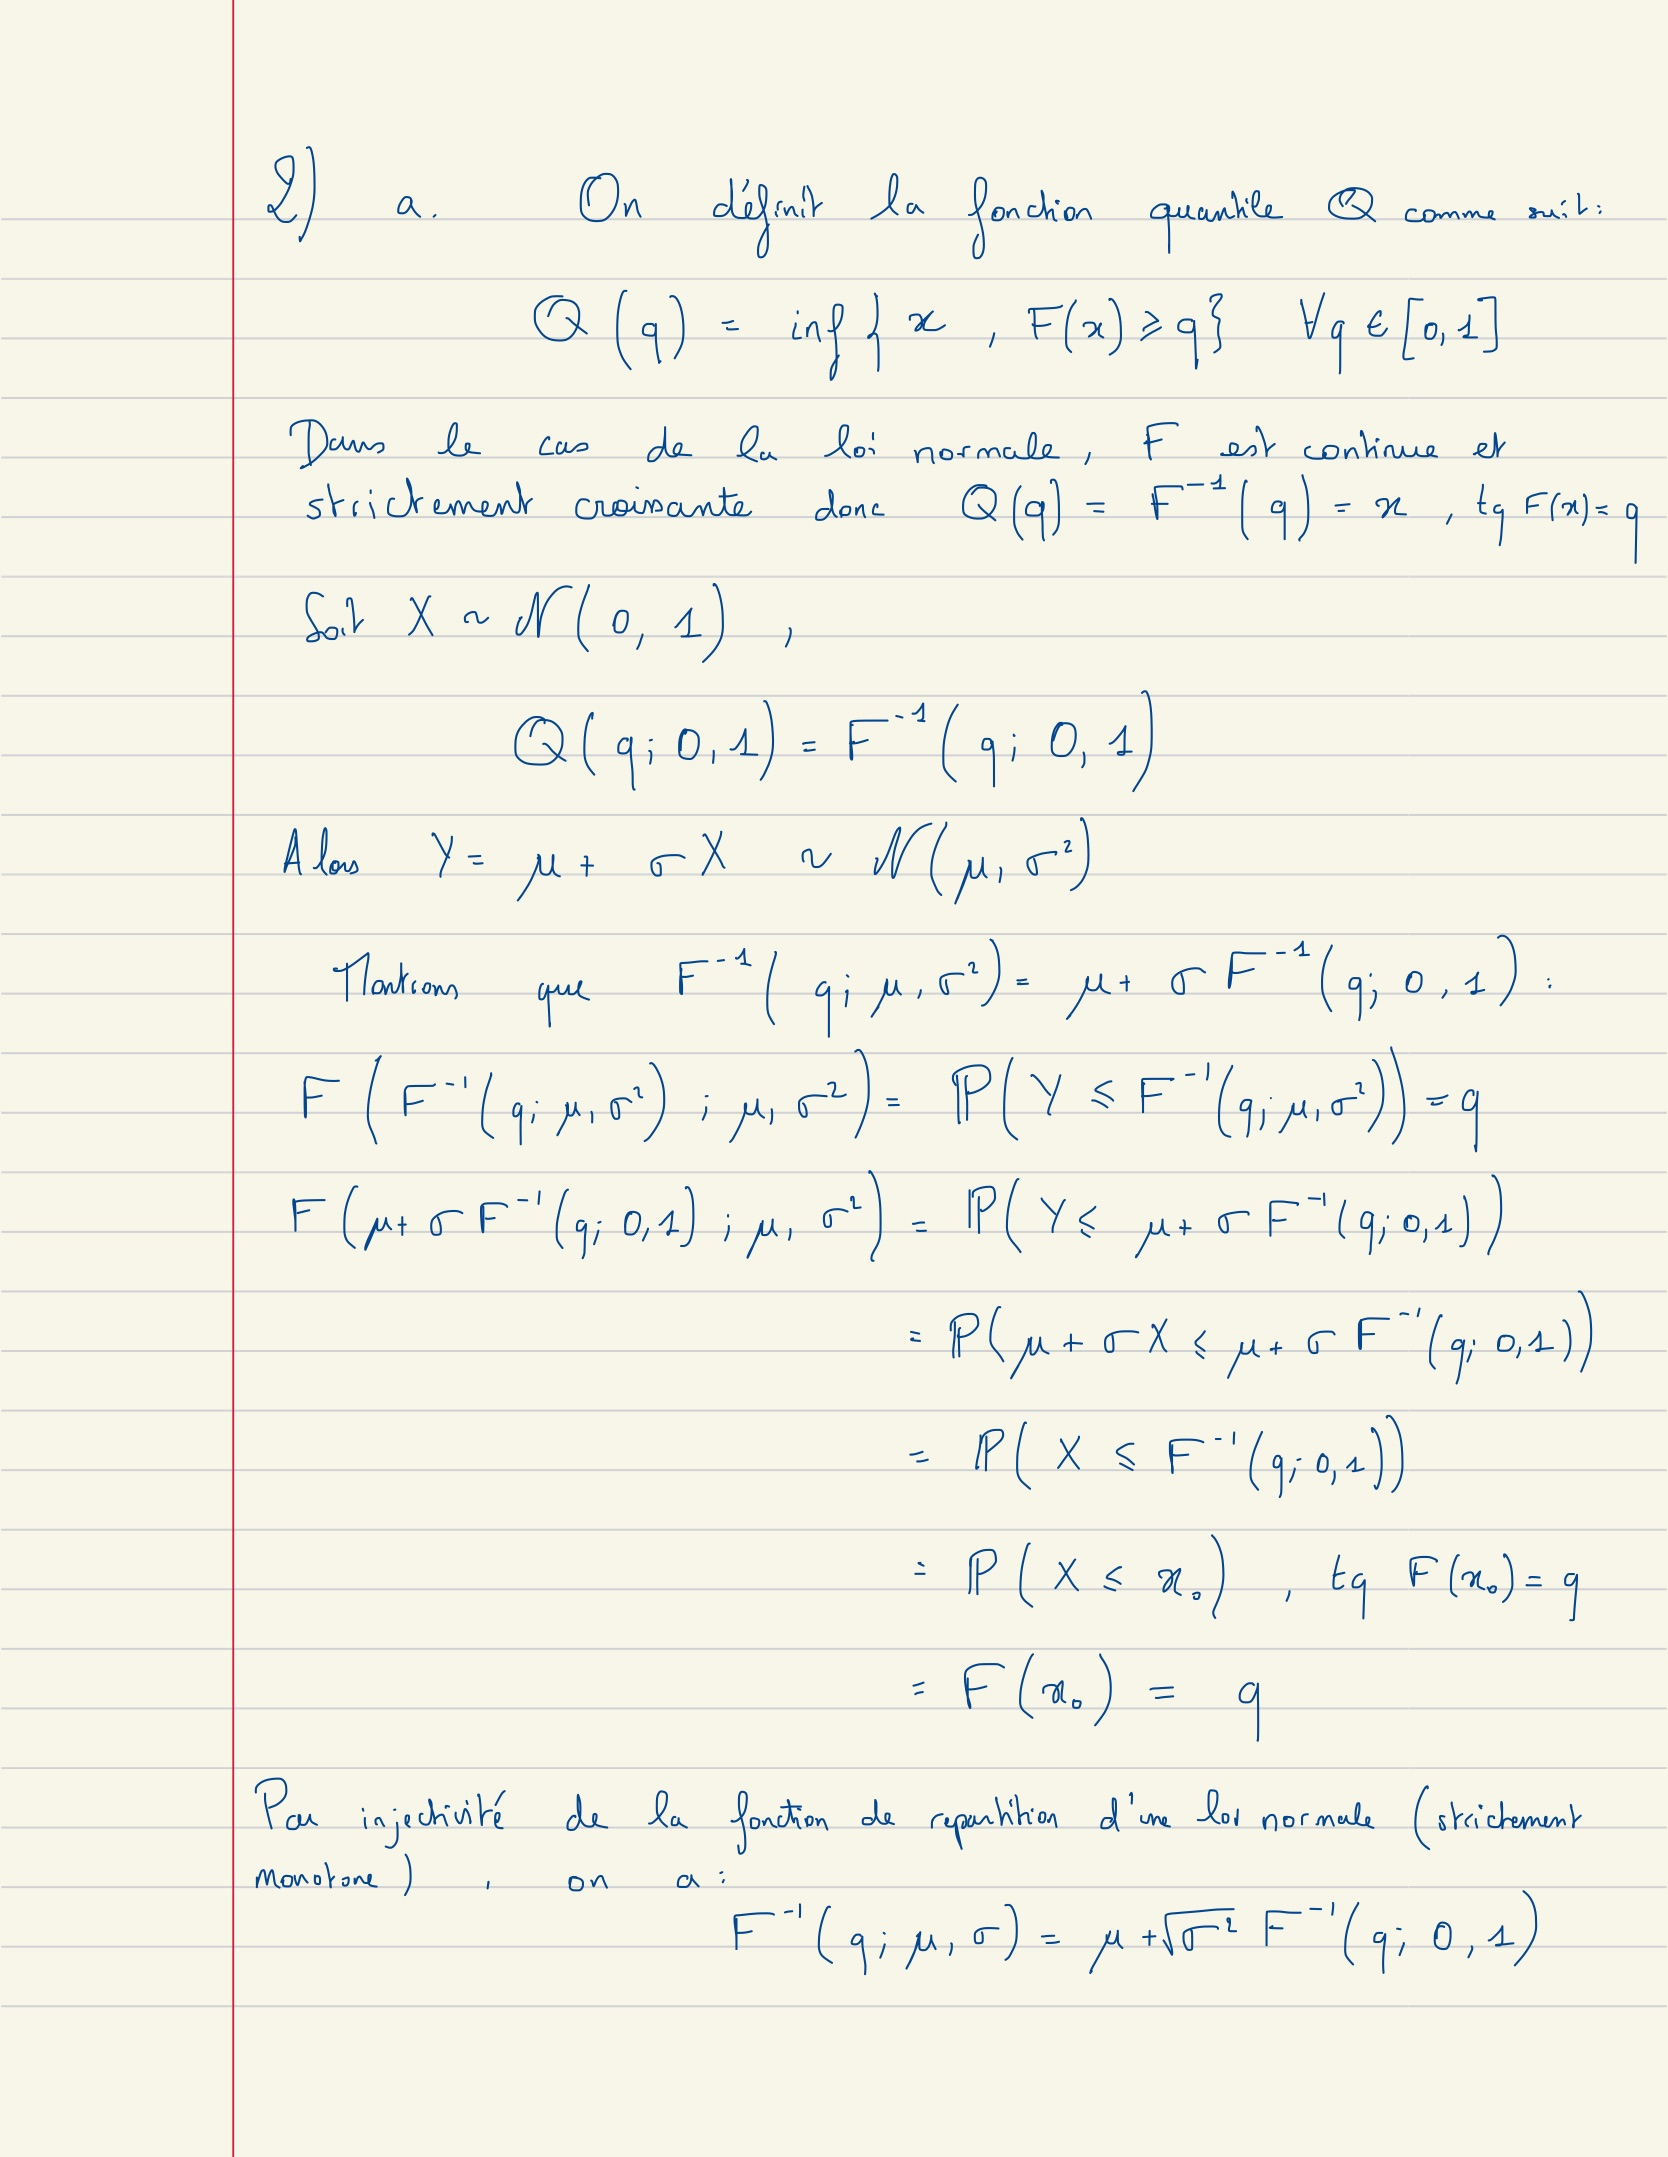

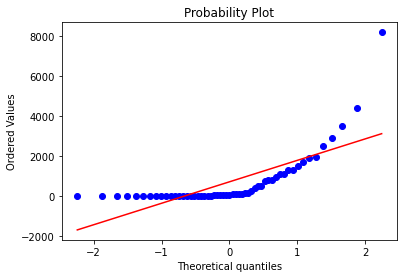

In [3]:
stats.probplot(costs, dist=stats.norm, plot=plt)
plt.show()

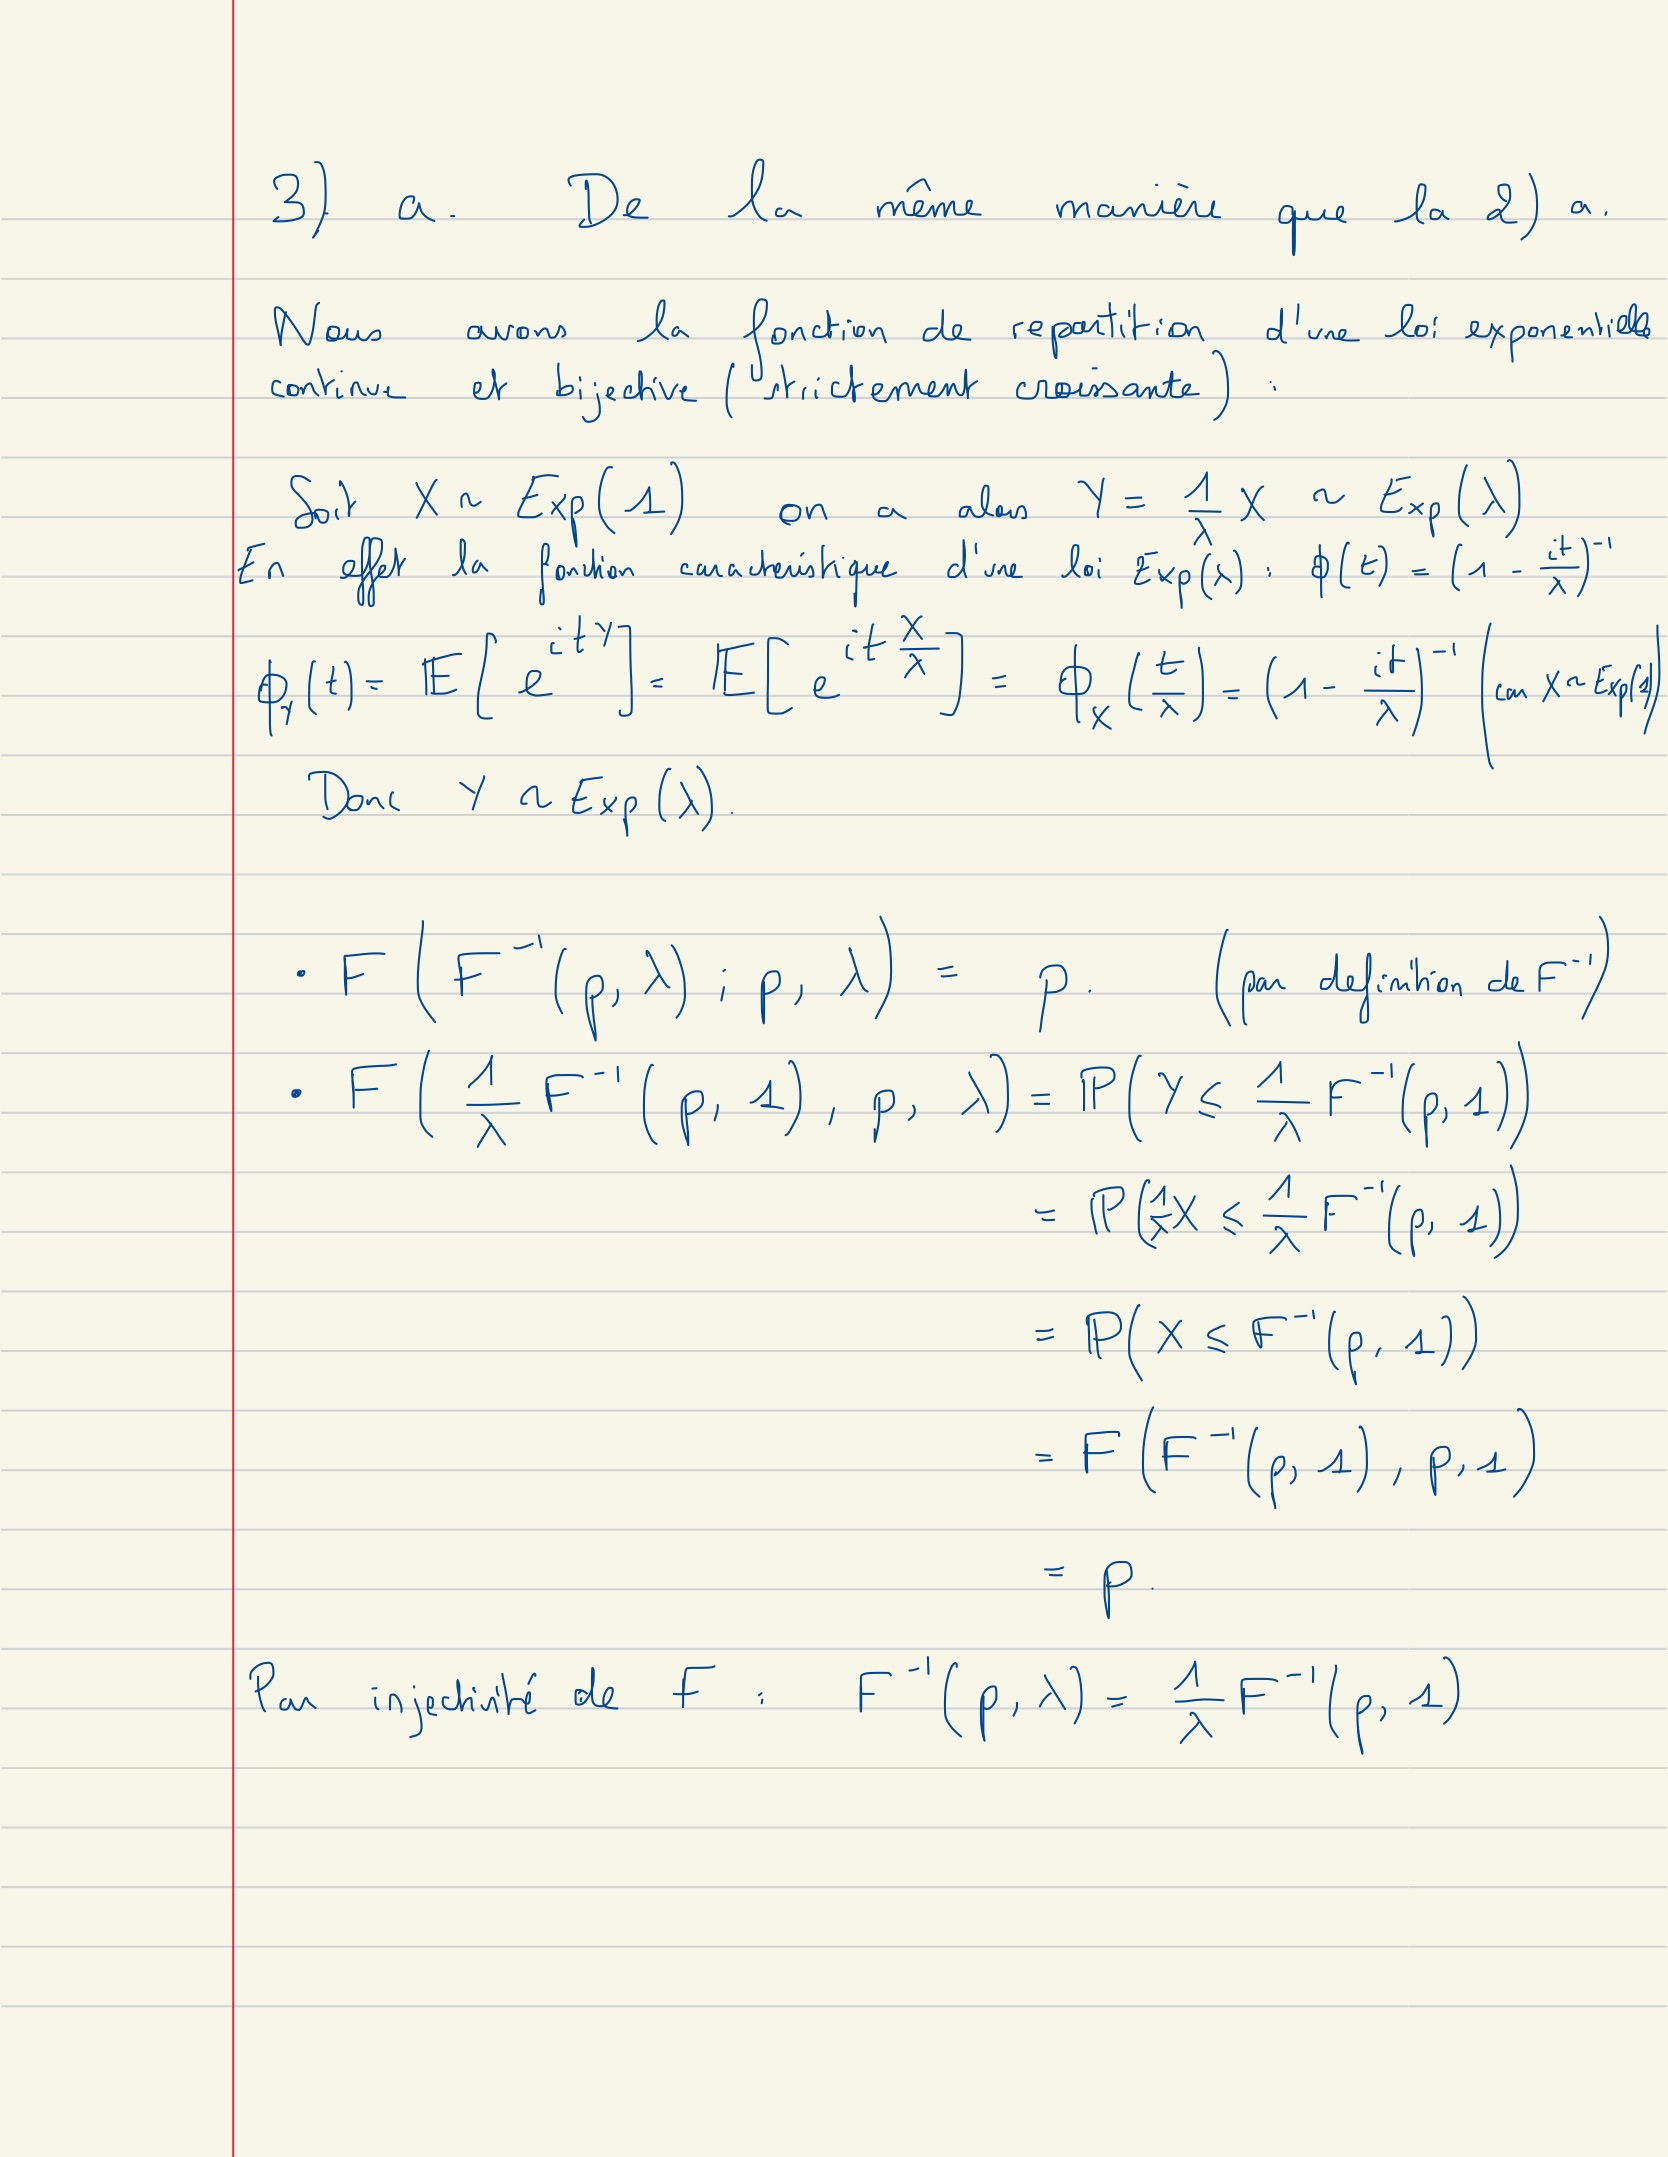

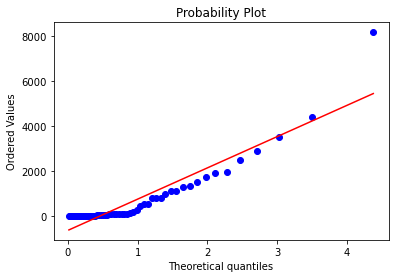

In [4]:
stats.probplot(costs, dist=stats.expon, plot=plt)
plt.show()

4) En observant les deux QQ-plot il nous semble plus plausible que les données suivent une loi exponentielle face à une loi normale. 

# Exercice 2

1) Voici le calcul de l'estimateur du maximum de vraisemblance de $\hat\lambda_n$

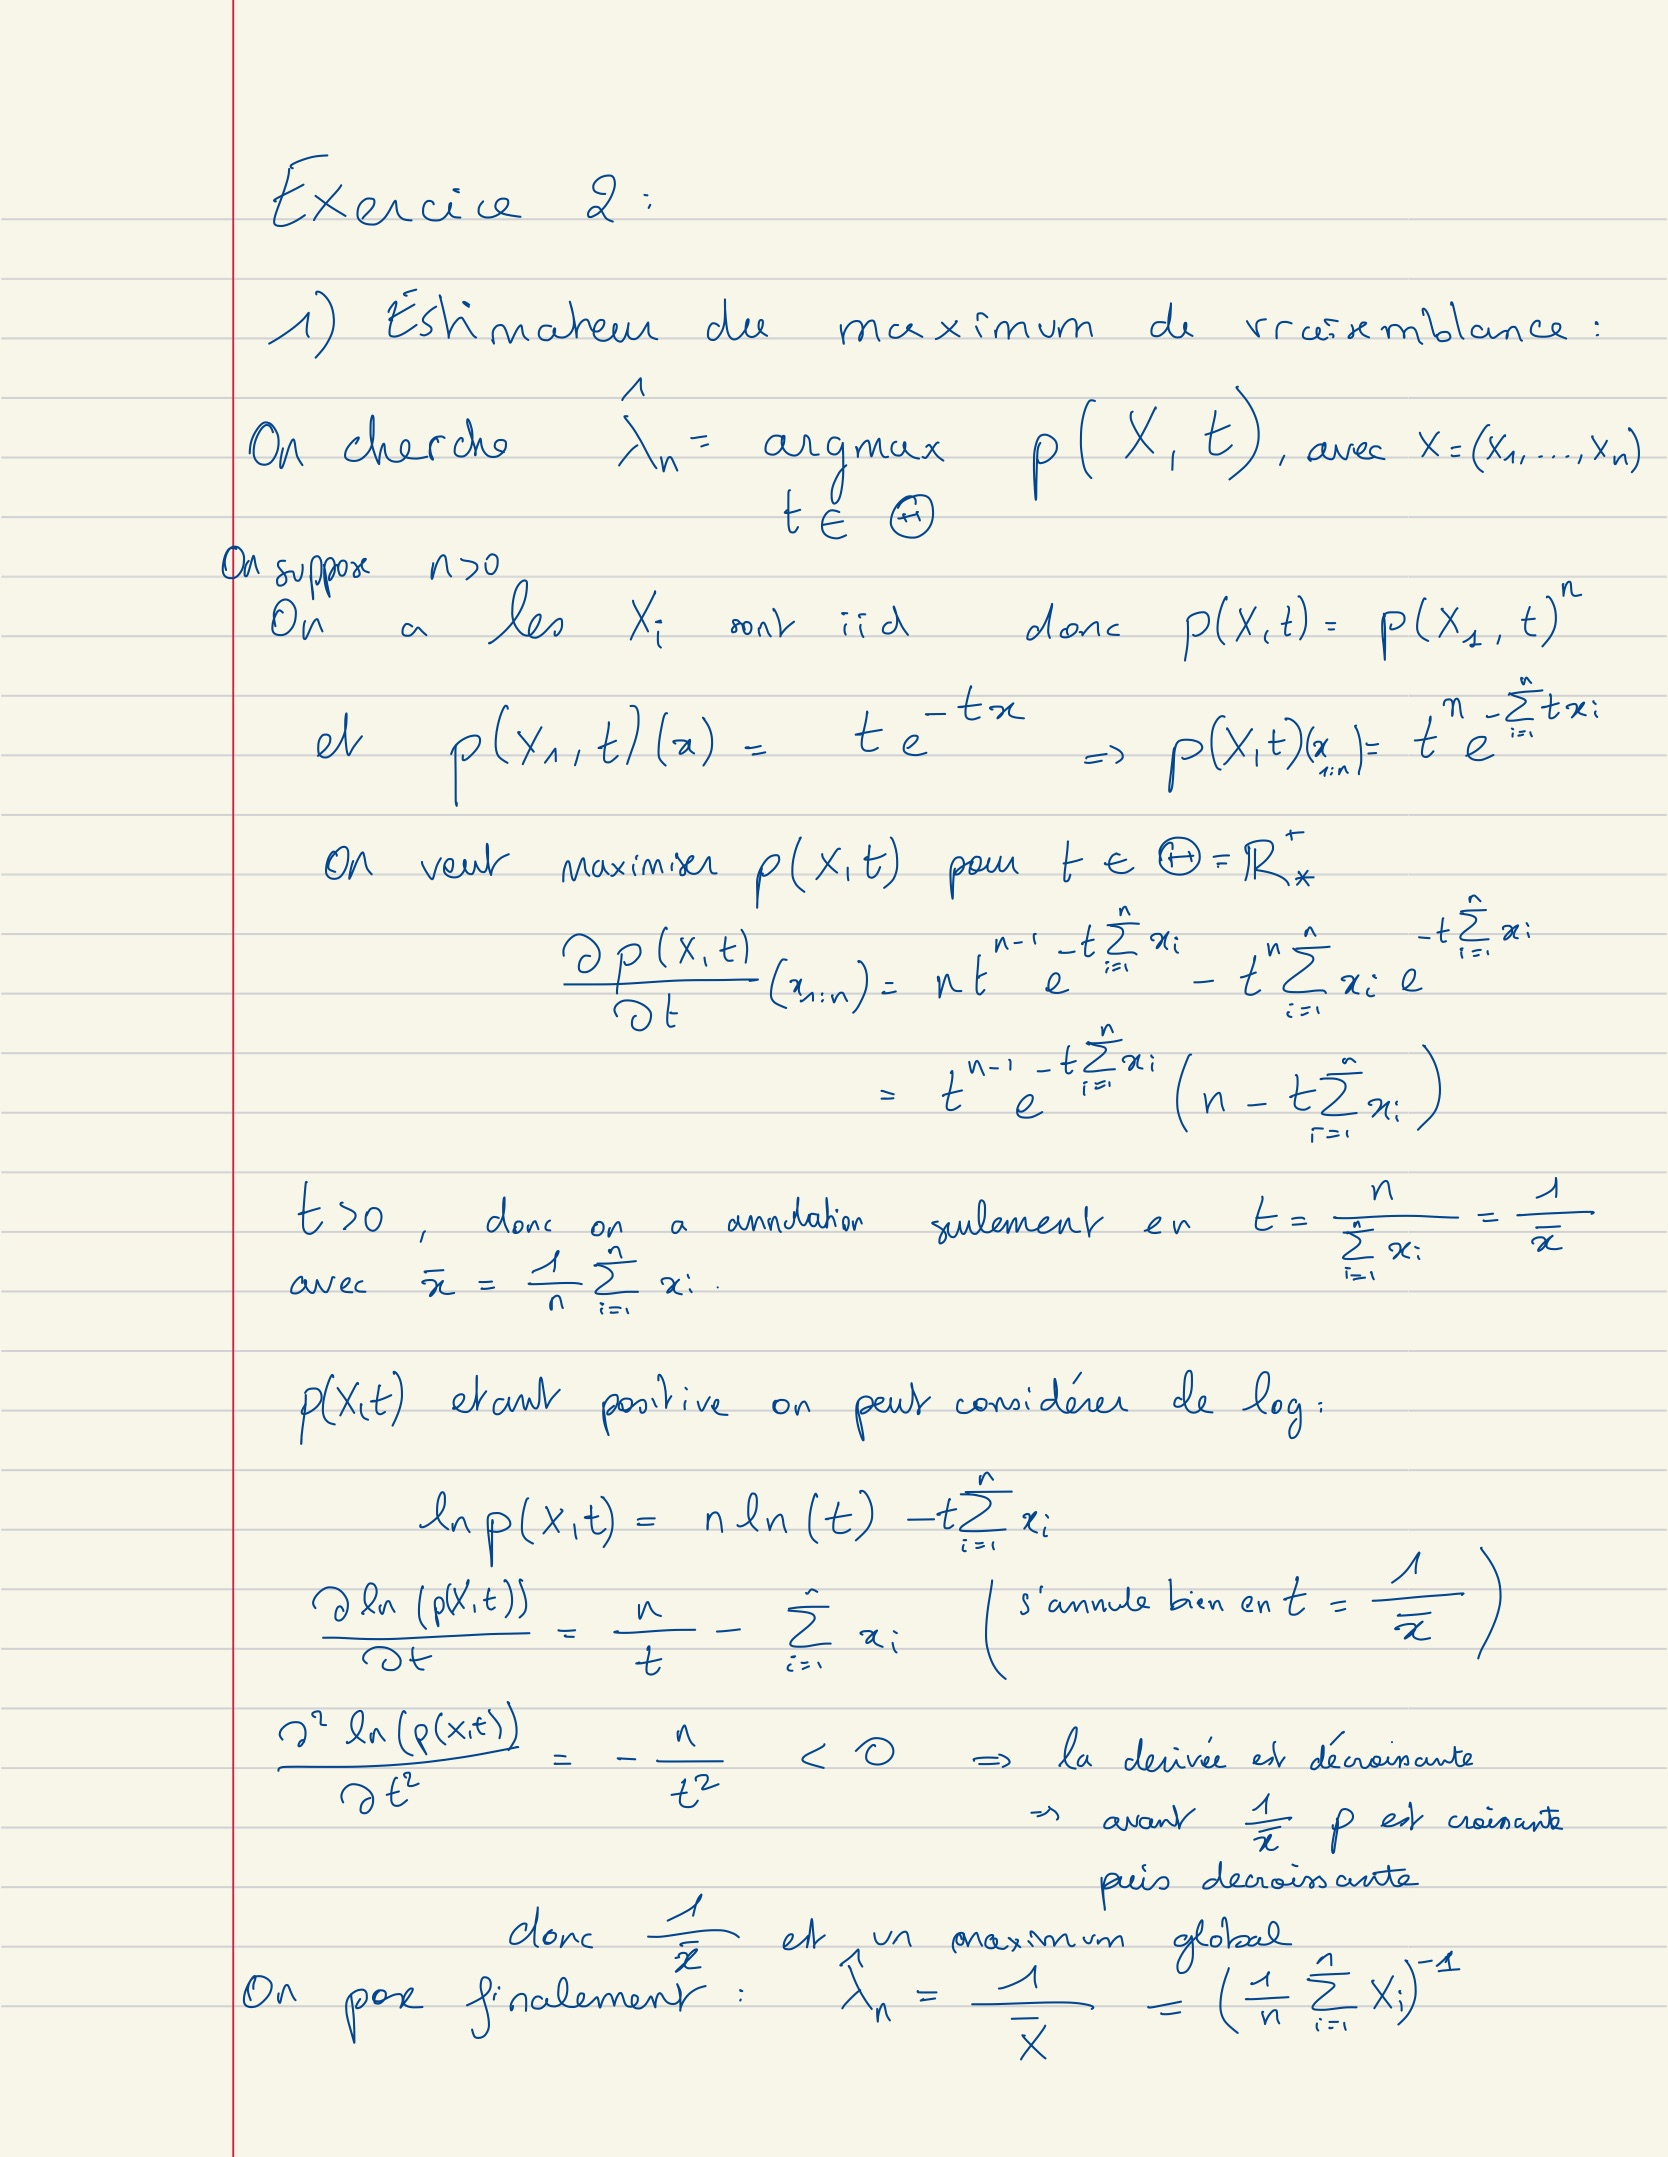

2 ) Définissons la moyenne empirique qui nous permettra de tracer la densité.

In [5]:
def em(X, N):
    return np.sum(X[0:N])/ N

lambda estimée = 0.0013767725947156965


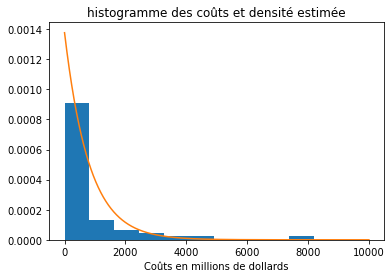

In [96]:
lam = 1/em(costs, len(costs))
print("lambda estimée = {}".format(lam))
x = np.linspace(0, 9000, 10000)

fig, ax = plt.subplots(1,1)
pdf_expo= stats.expon.pdf(x, scale= 1 / lam)

ax.hist(costs, density=True)
ax.plot(pdf_expo)
plt.xlabel("Coûts en millions de dollards")
ax.set_title("histogramme des coûts et densité estimée")
plt.show()

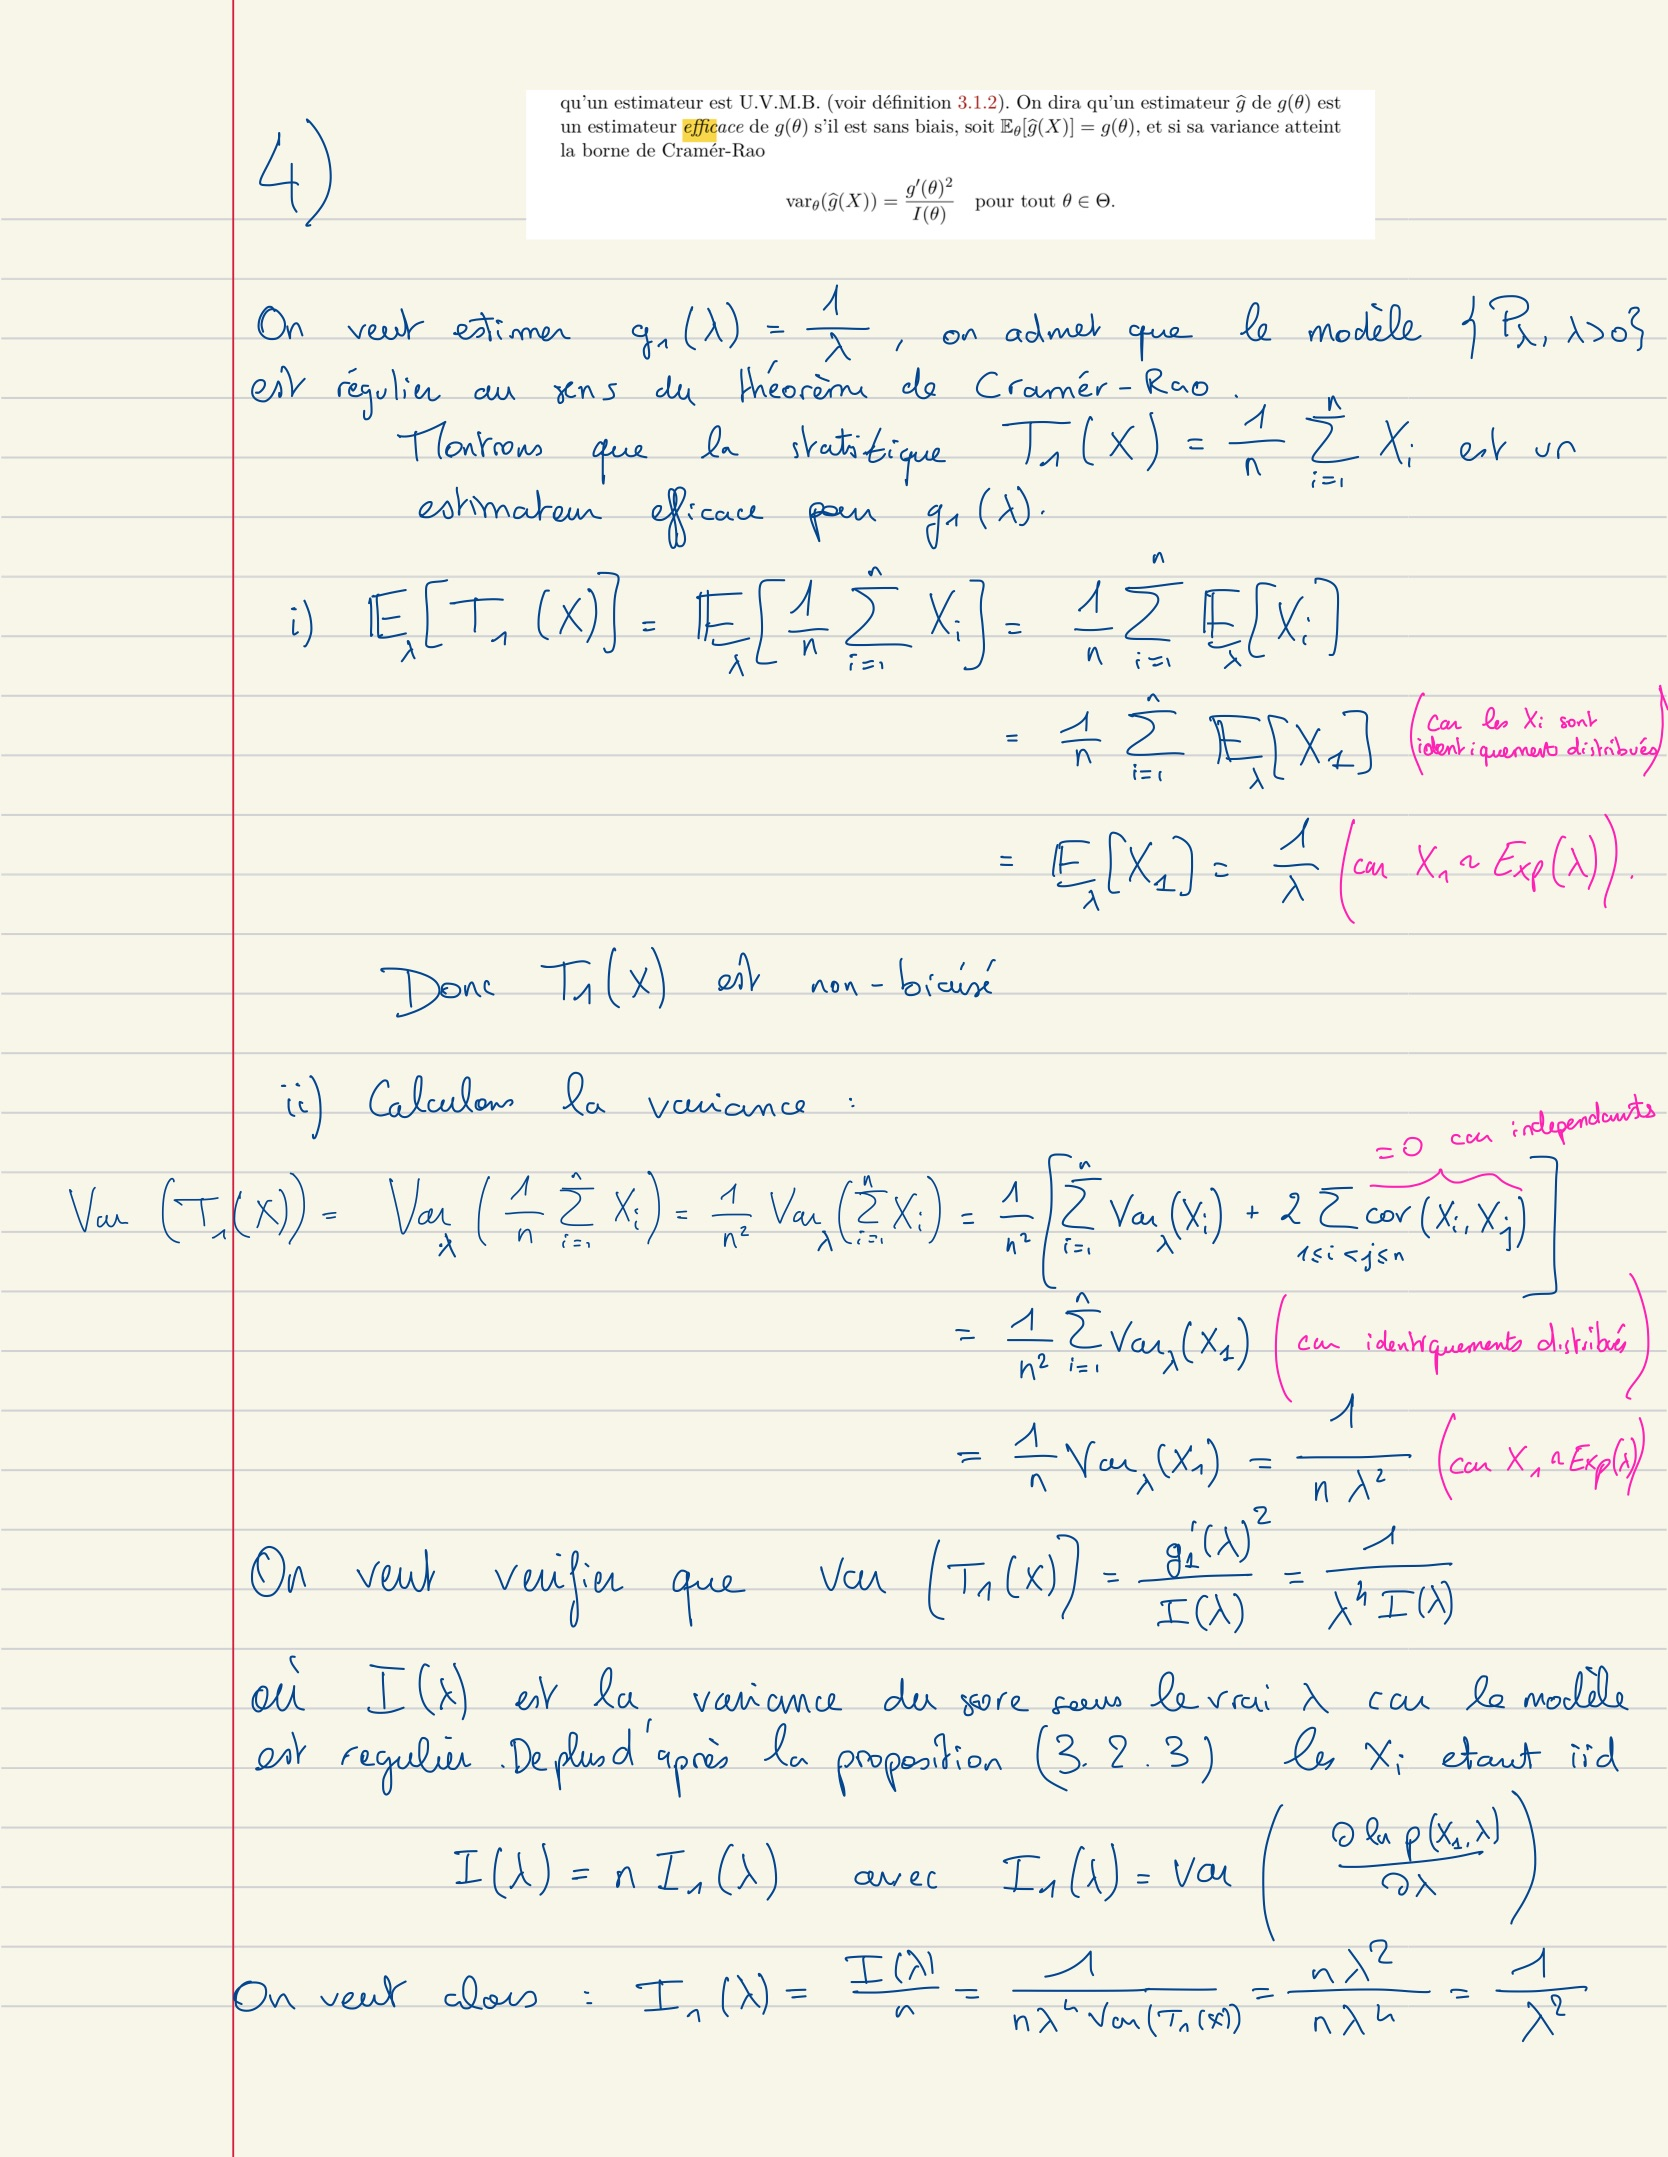

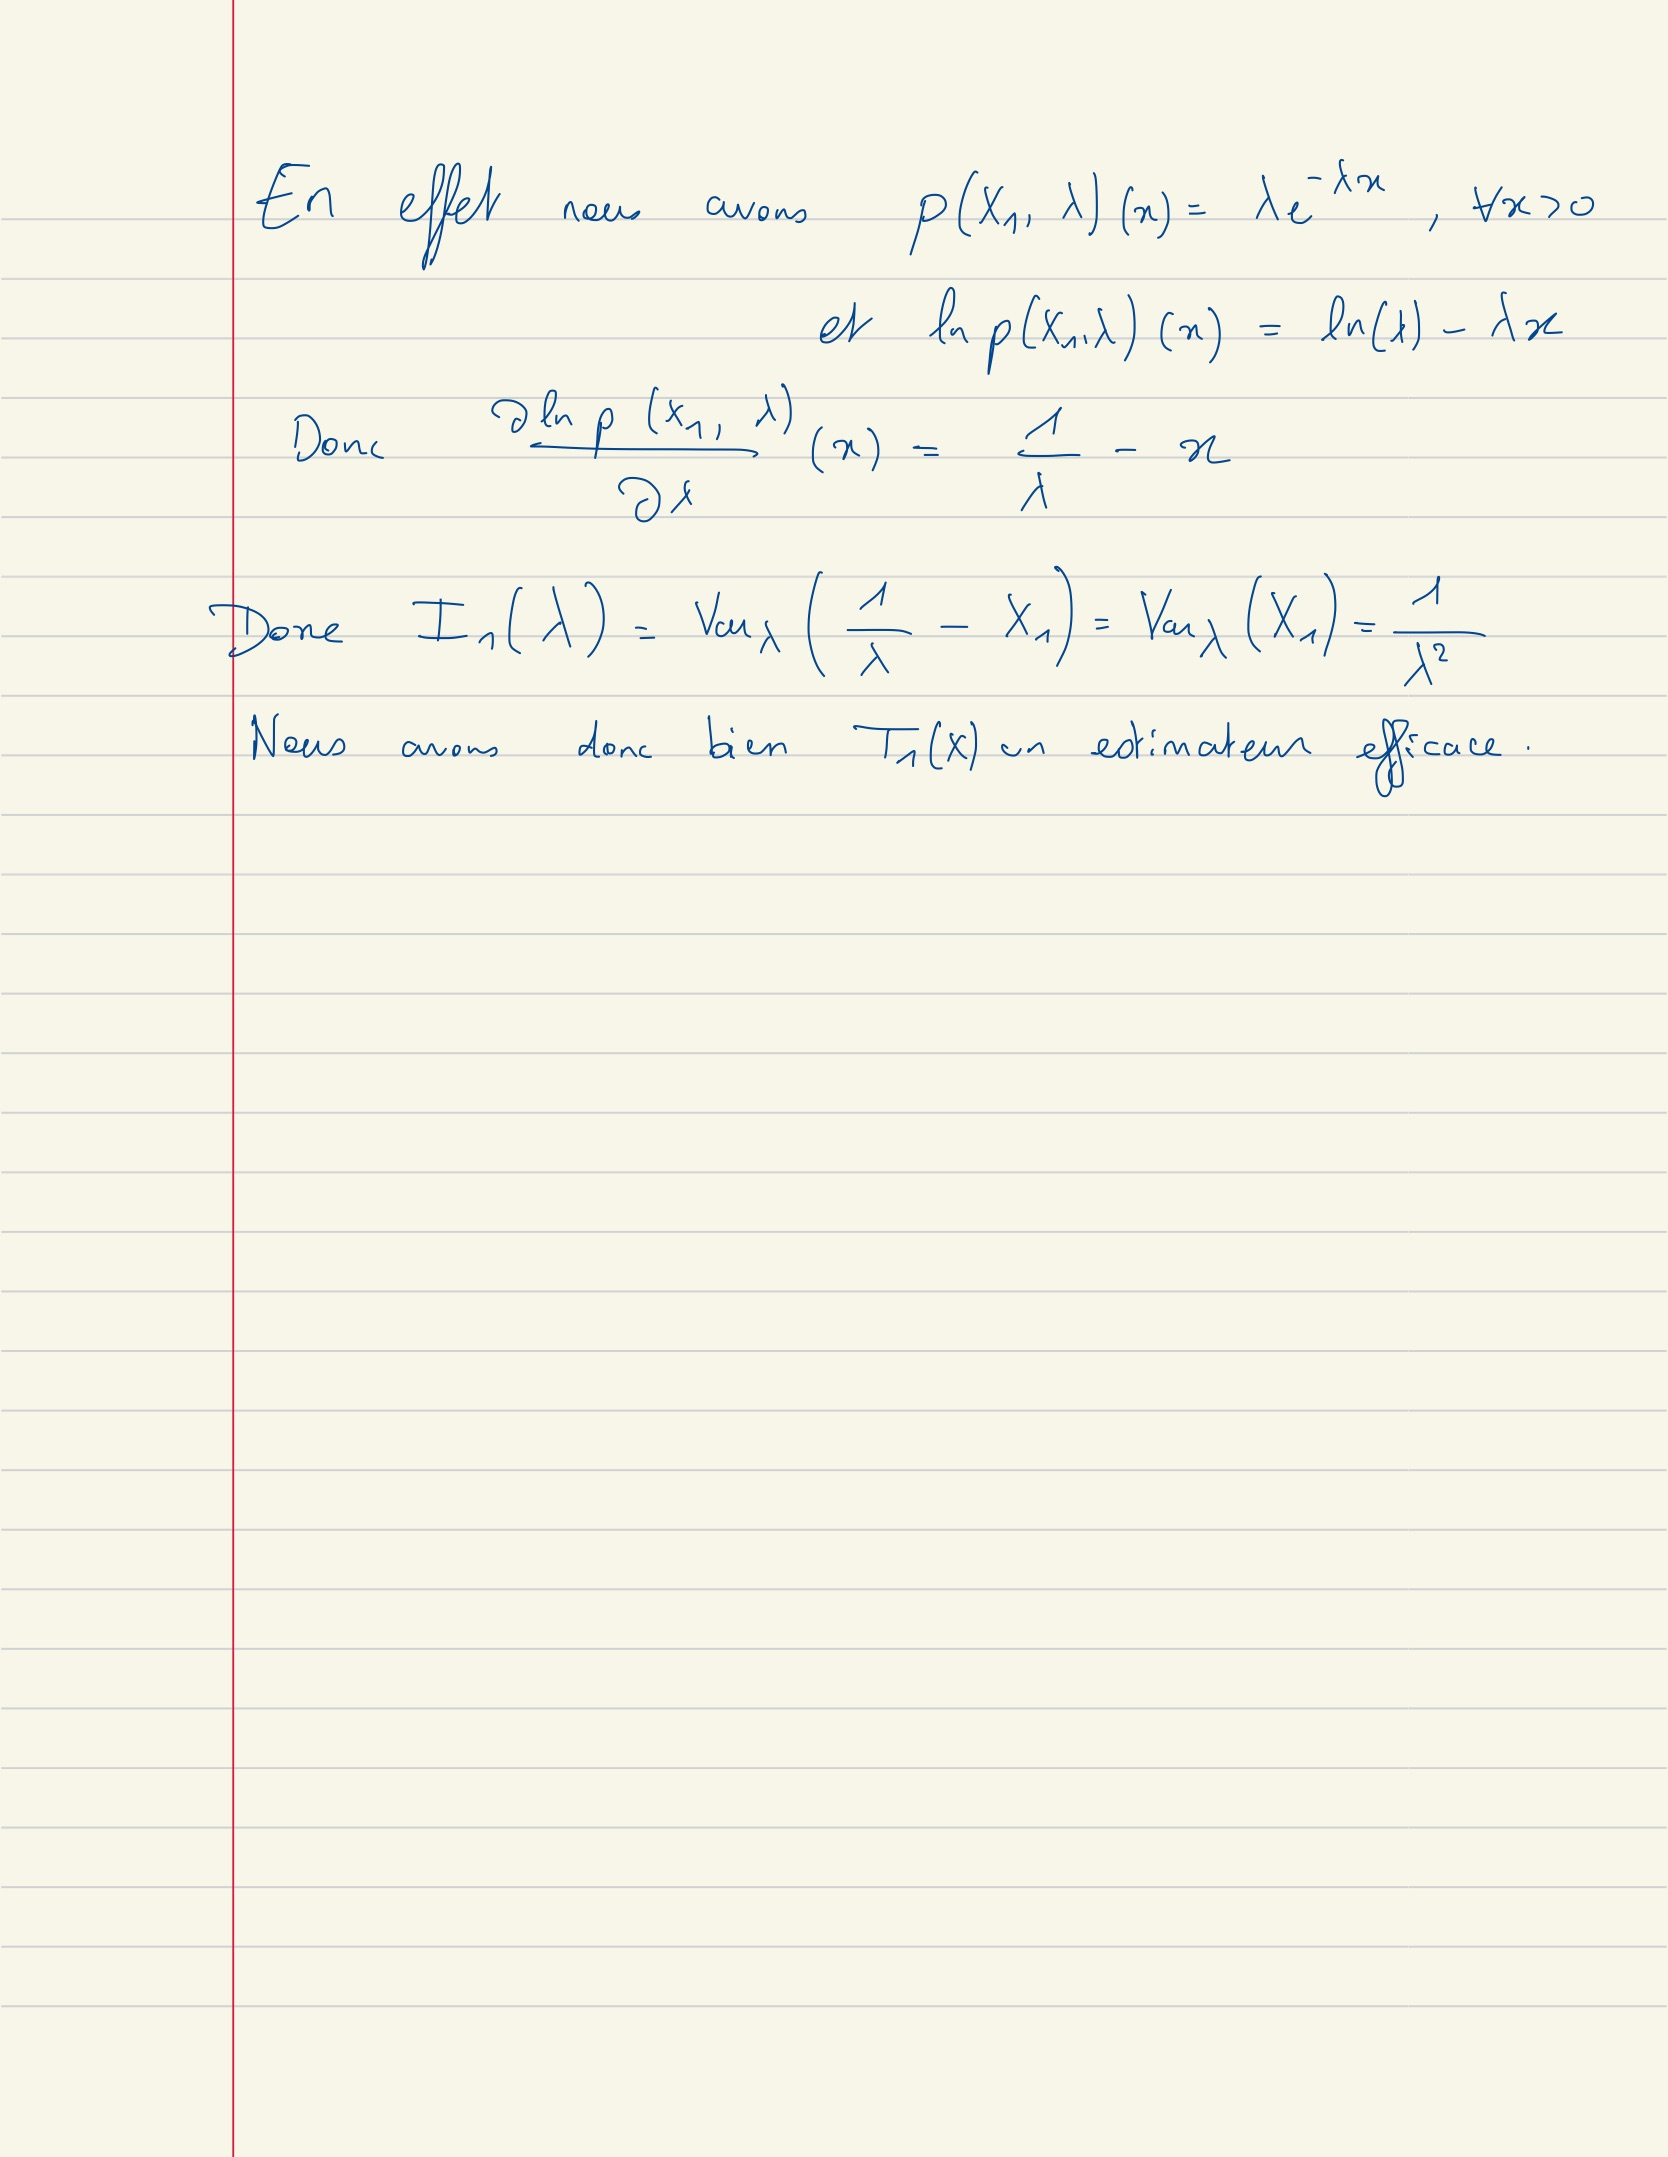

5) $1/\lambda$ correspond à l'espérence d'une variable aléatoire qui suit une loi exponentielle de parametre $\lambda$ donc nous avons $1 / \lambda$ qui est approché par $T_1(X)$ pour un grand nombre de données. On remarque aussi que l'estimateur du maximum de vraissemblance coincide avec un estimateur par moyenne empirique. 

In [33]:
T1 = em(costs, len(costs))

print("Nous estimons g1 par g1 = T1 = {}".format(T1))

Nous estimons g1 par g1 = T1 = 726.3363636363637


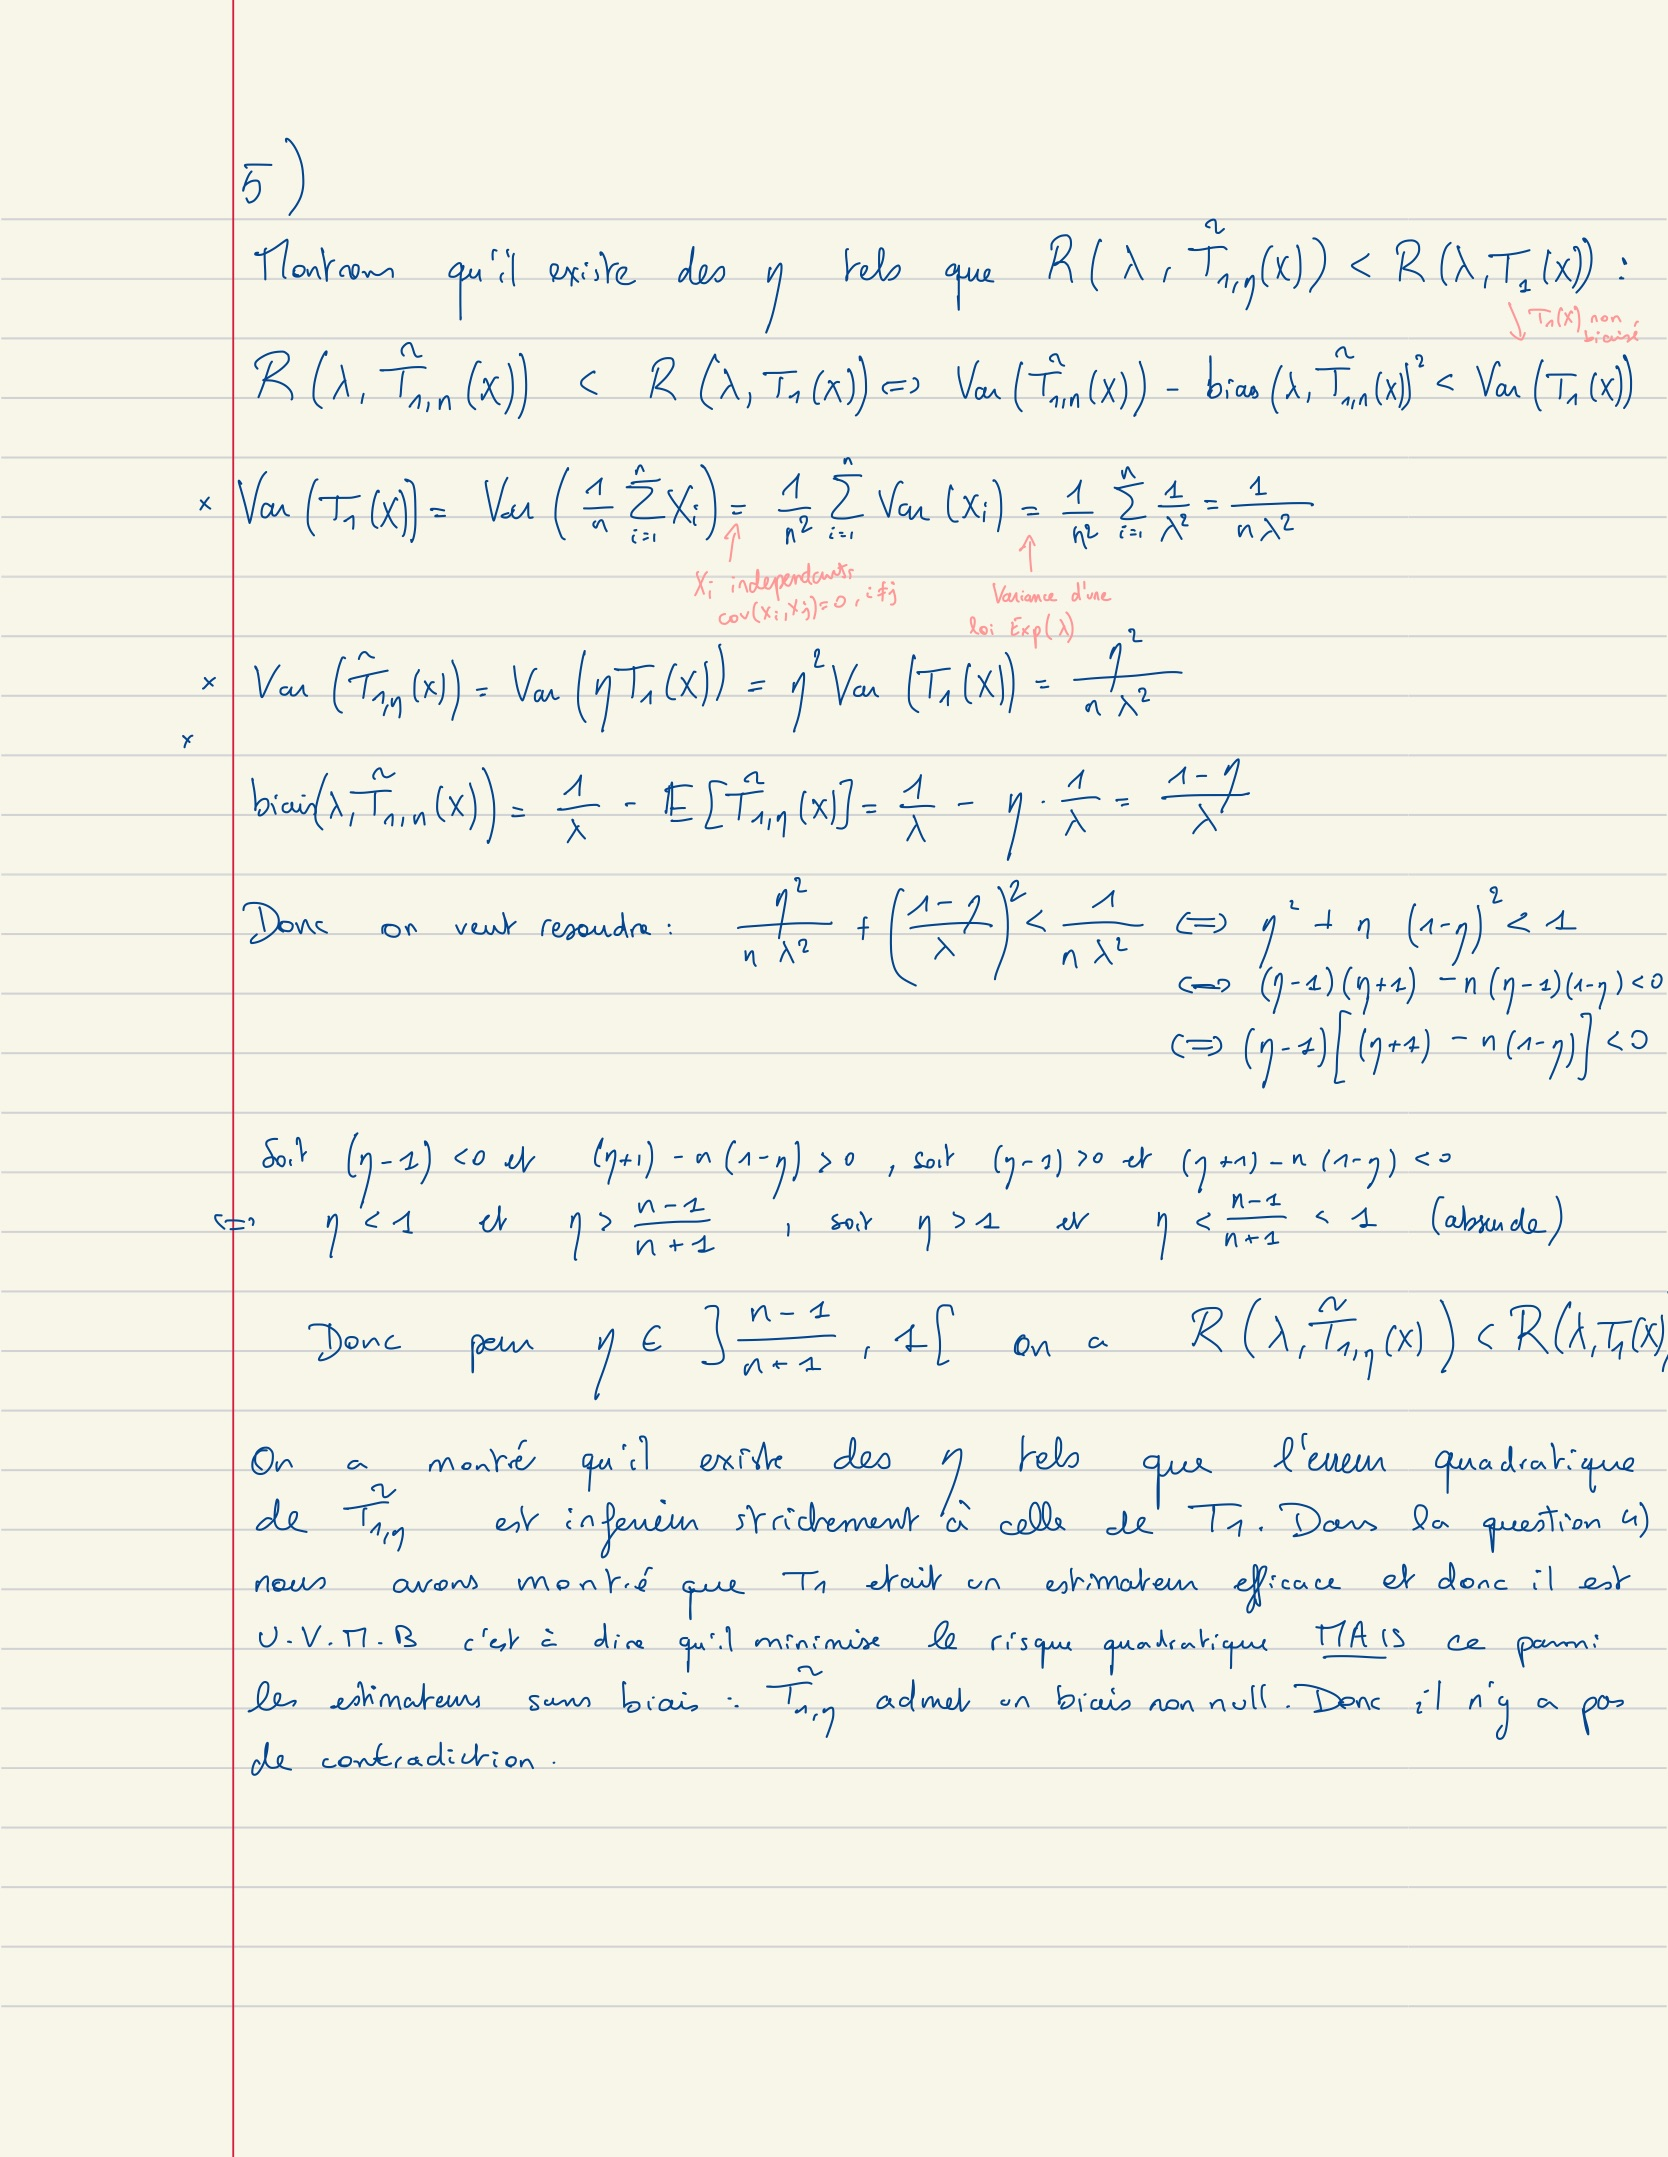

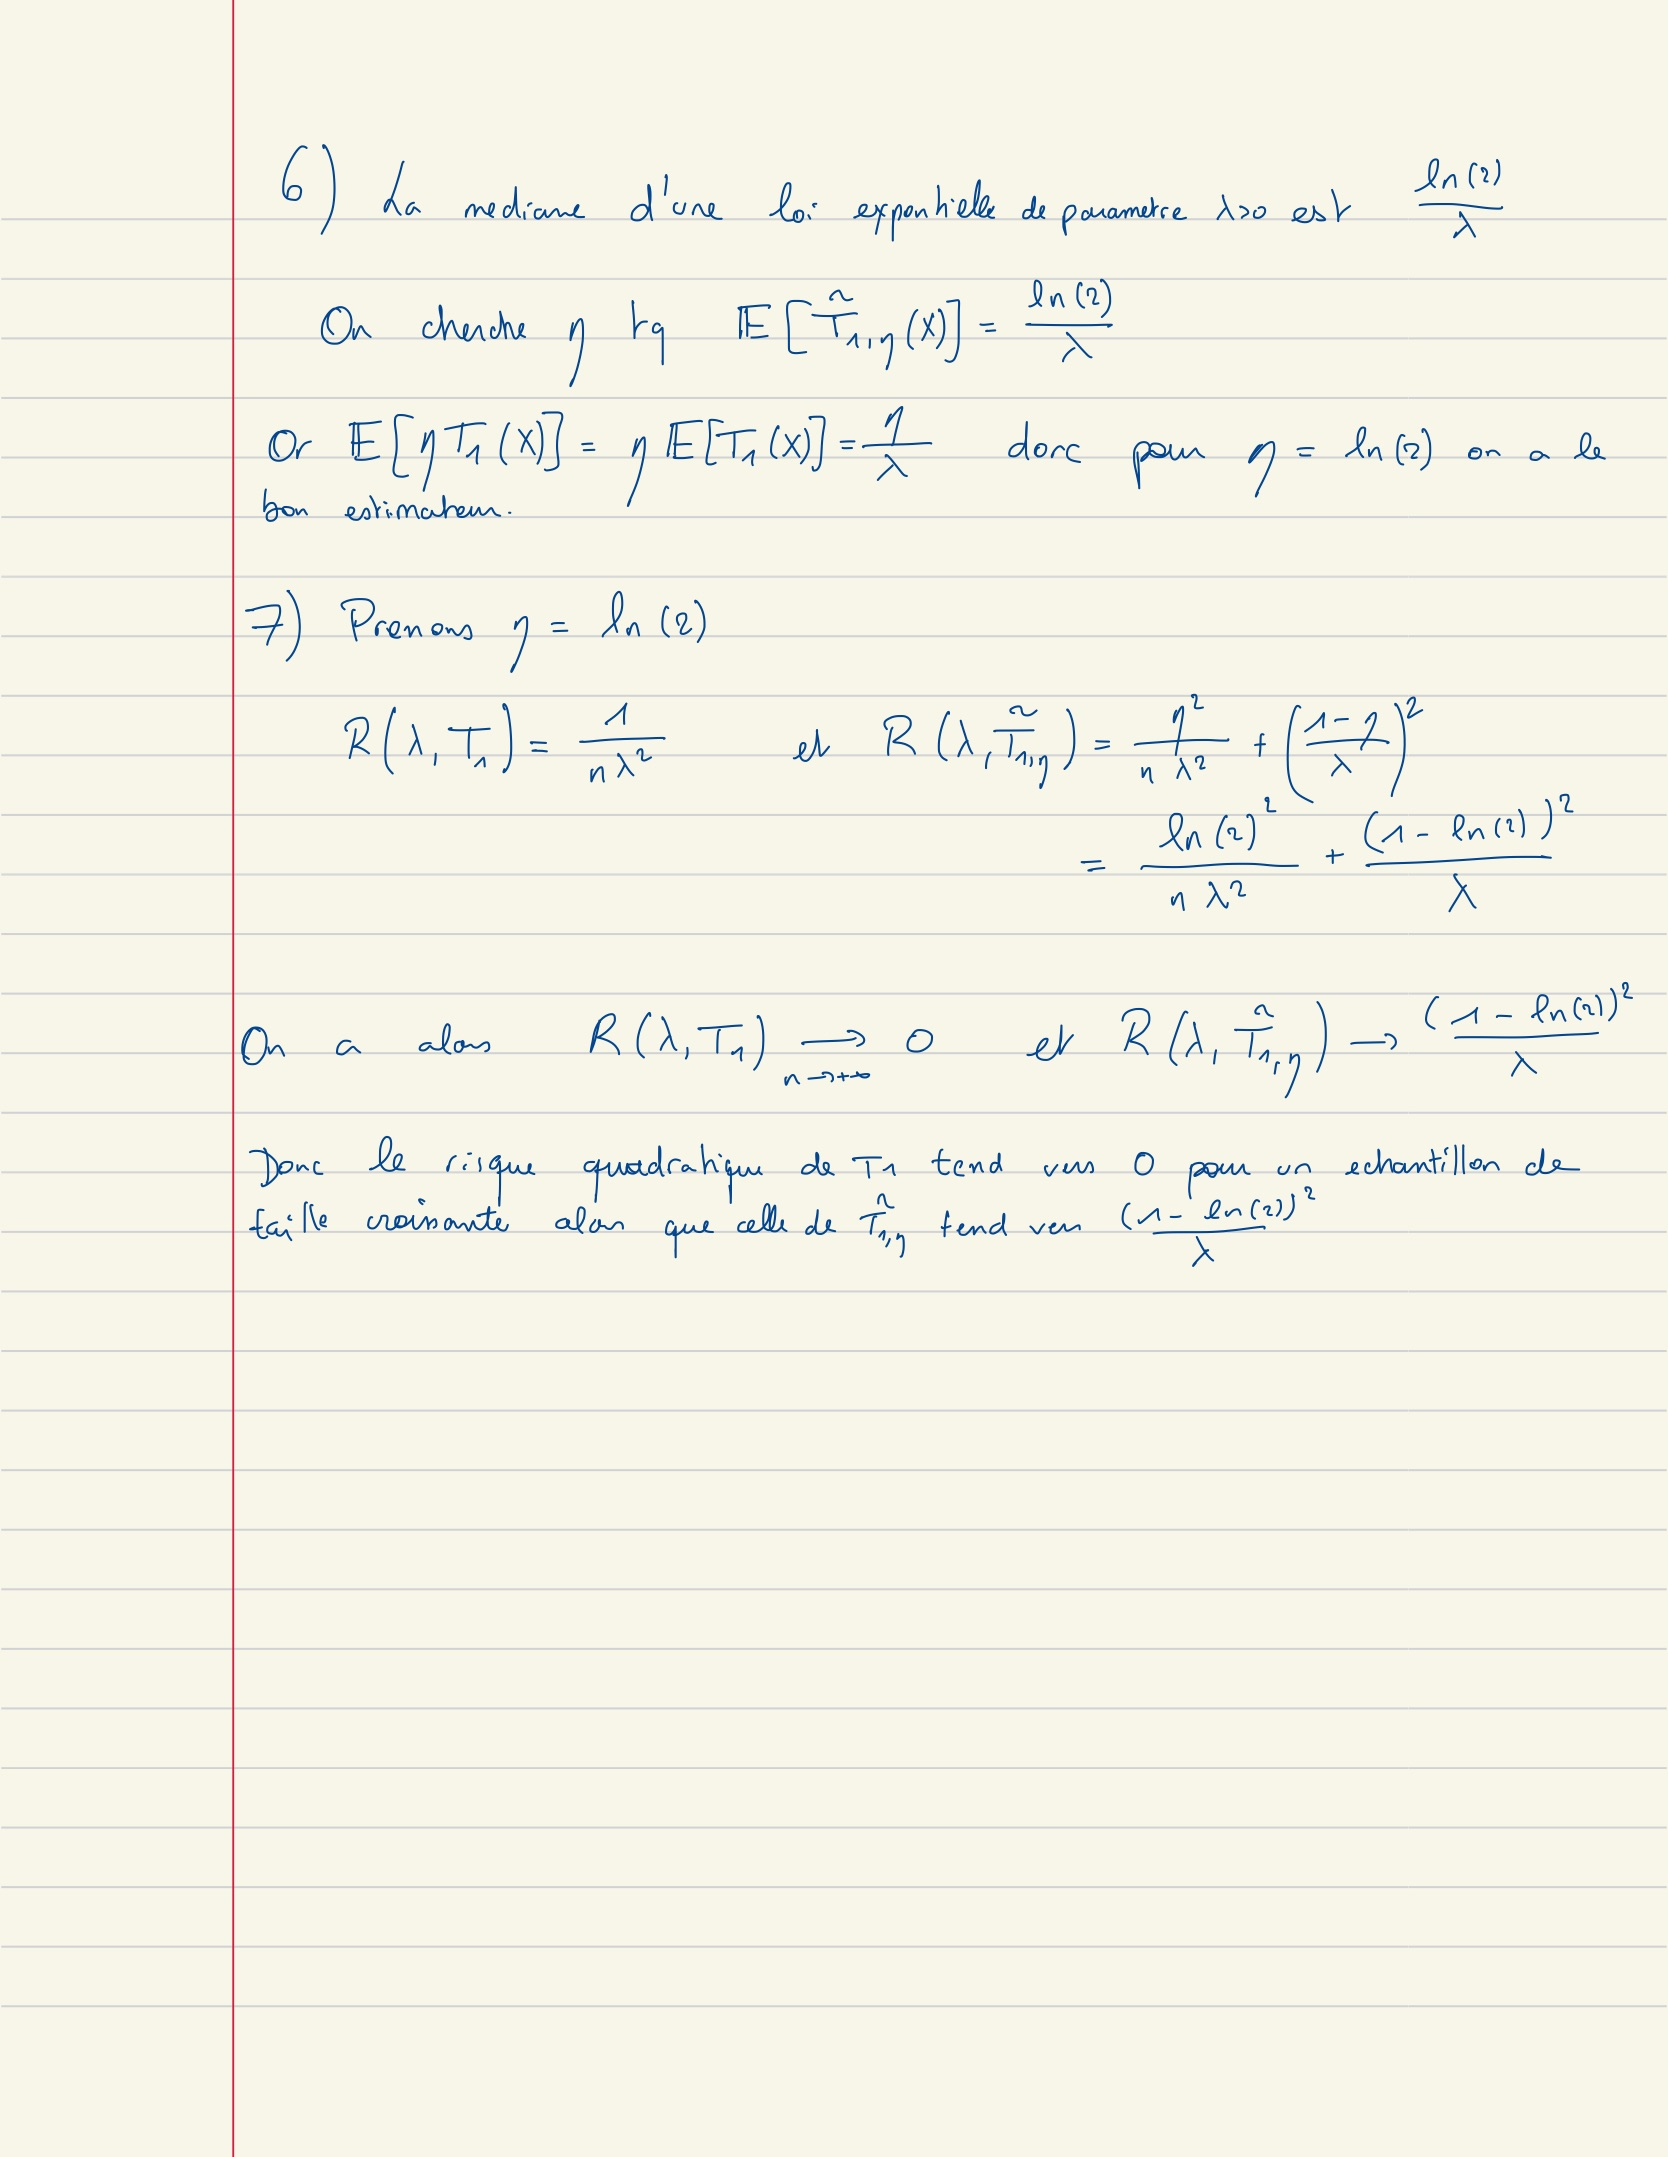

In [102]:
for n in range(10):
    print("{} : {}".format(n, (n-1)/(n+1) < np.log(2)))

0 : True
1 : True
2 : True
3 : True
4 : True
5 : True
6 : False
7 : False
8 : False
9 : False


On pourrait donc discuter de l'efficacité de l'estimateur de $T_{1,\eta}$ (pour $\eta = \ln(2)$) car son risque ne tend pas vers 0 meme pour un nombre infini d'observations. De plus pour le nombre d'échantillons entre 0 et 5 le risque quadratique de $T_{1,\eta}$ est inférieur à celui de $T_{1}$.

# Suite 6)

In [35]:
mediane_estimee = np.log(2) * T1
print(mediane_estimee)

503.4580025927086


In [36]:
mediane_empirique = np.median(costs)
print(mediane_empirique)

89.9


La mediane estimée est celle d'une variable suivant une loi exponentielle de parametre 1/g1 alors que la mediane empirique correspond à la médiane des données, on observe qu'elle differe grossierement, il faudrait plus de données pour se rapprocher de la médiane estimée. 

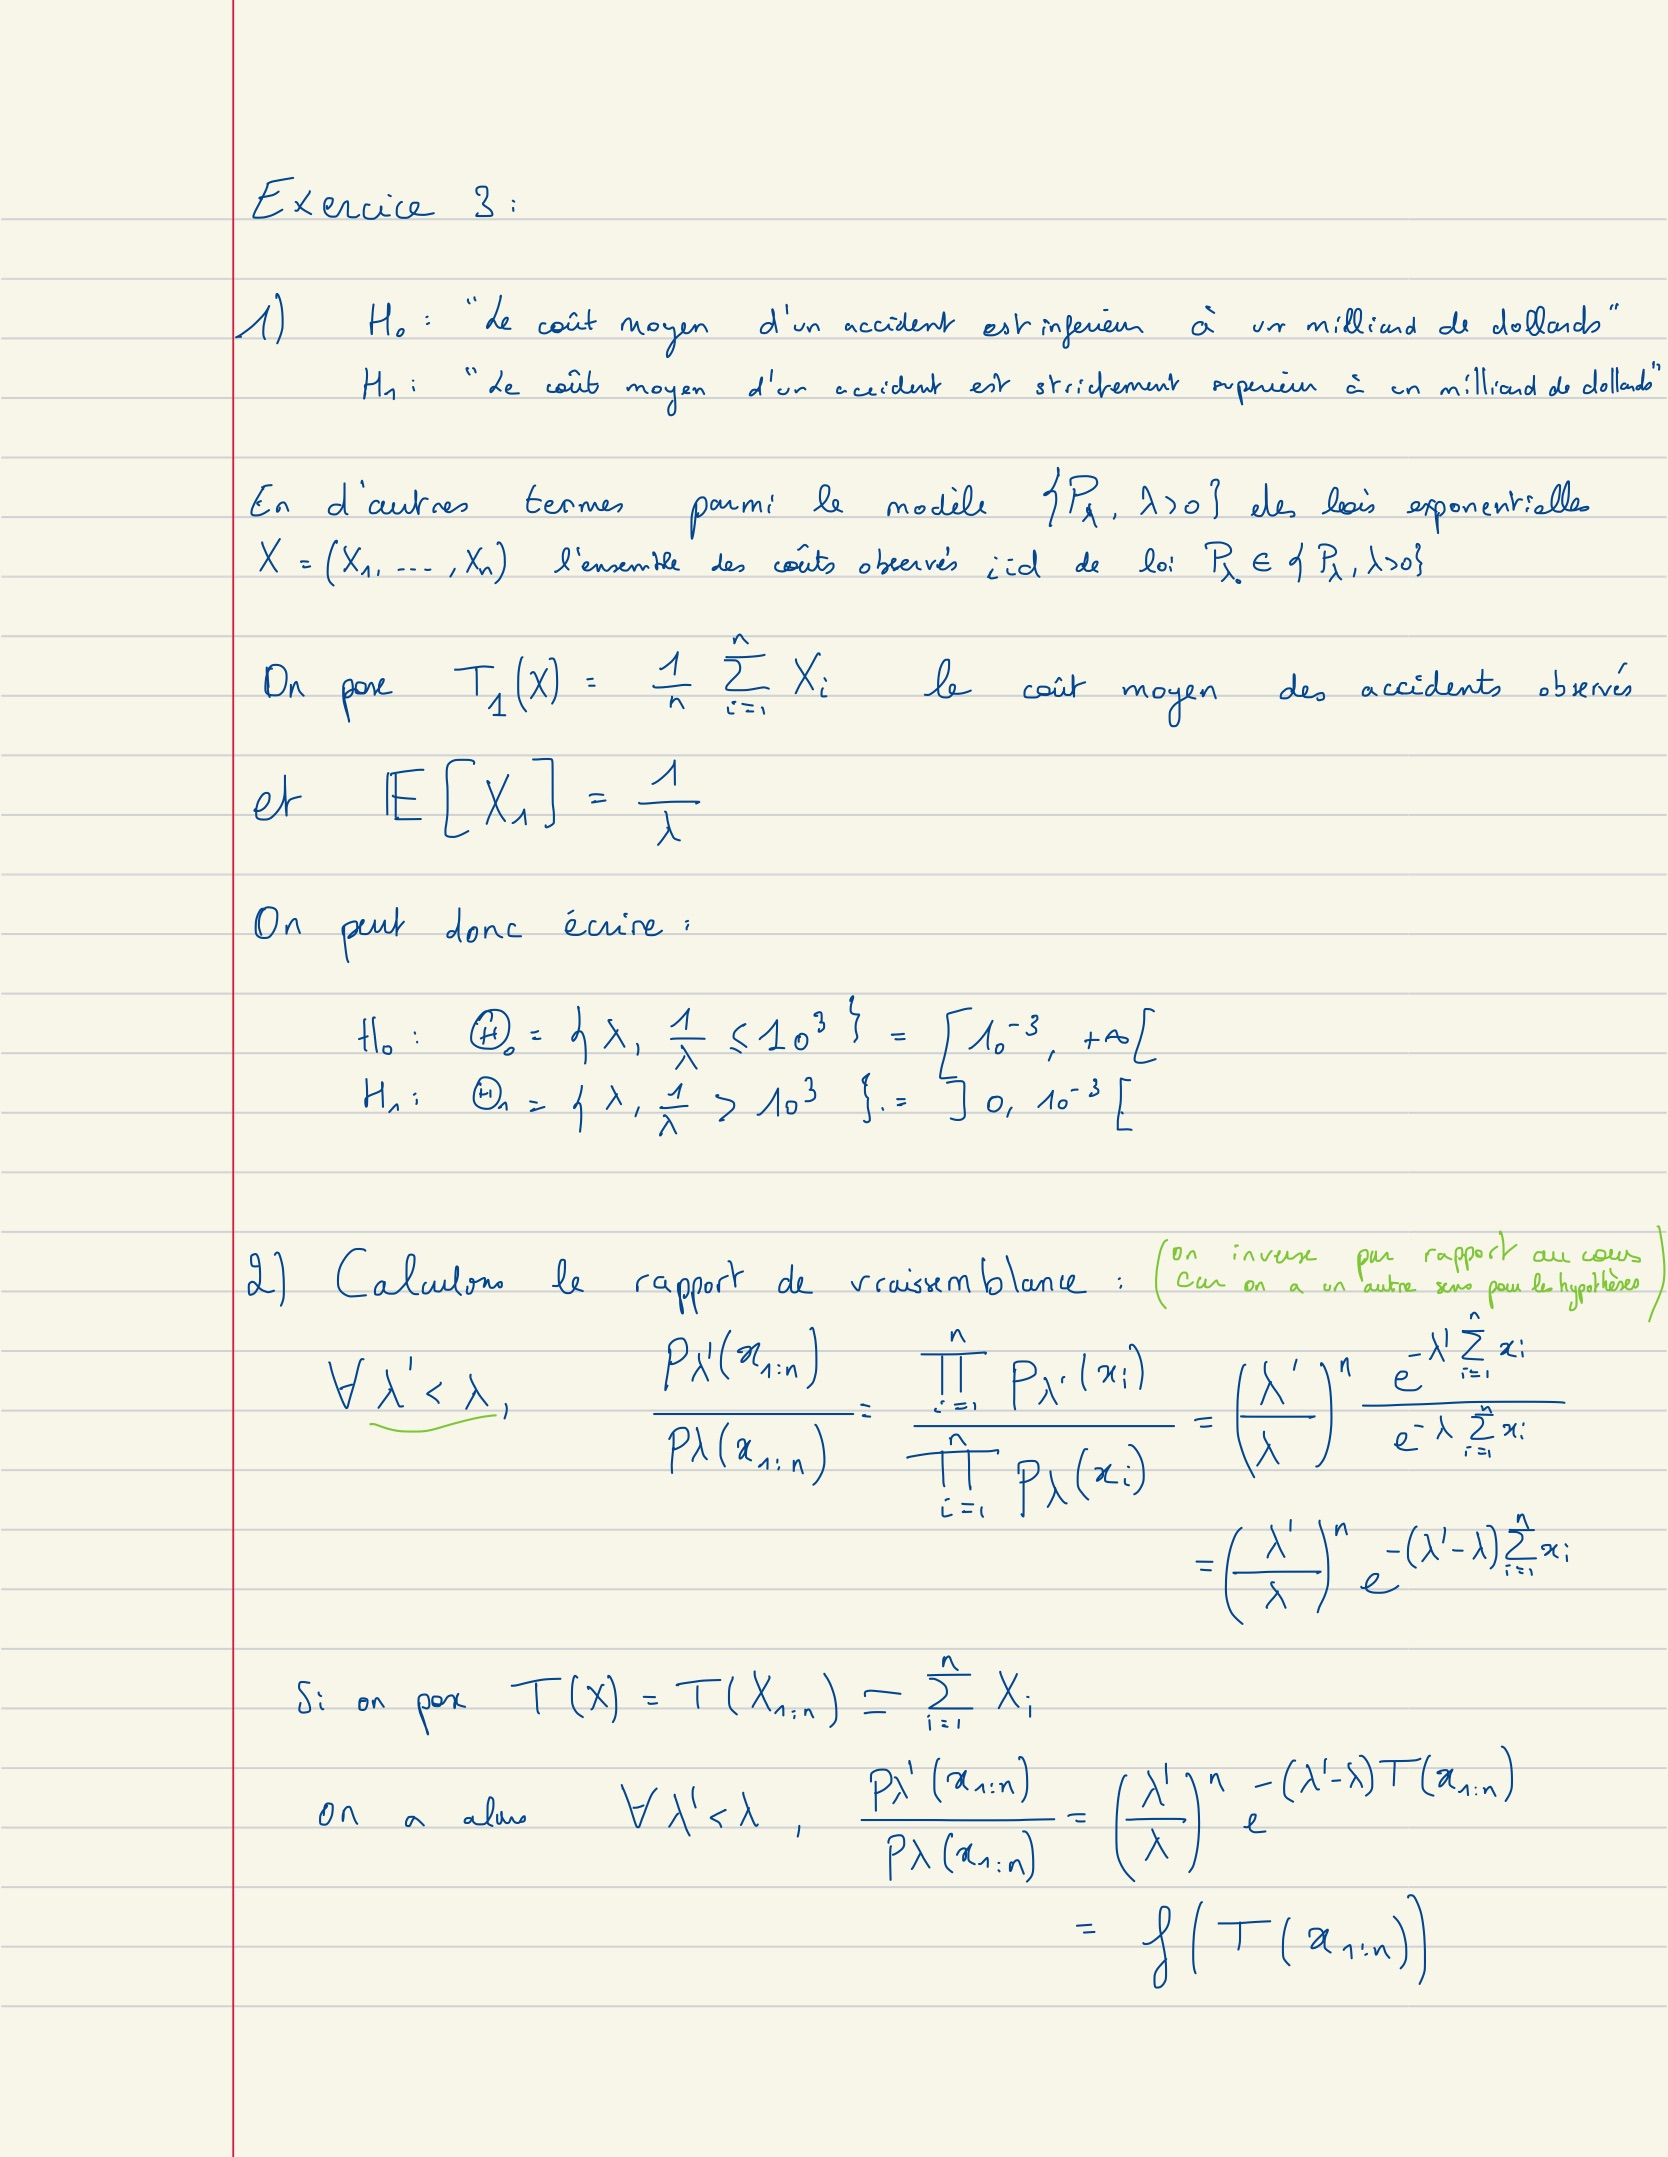

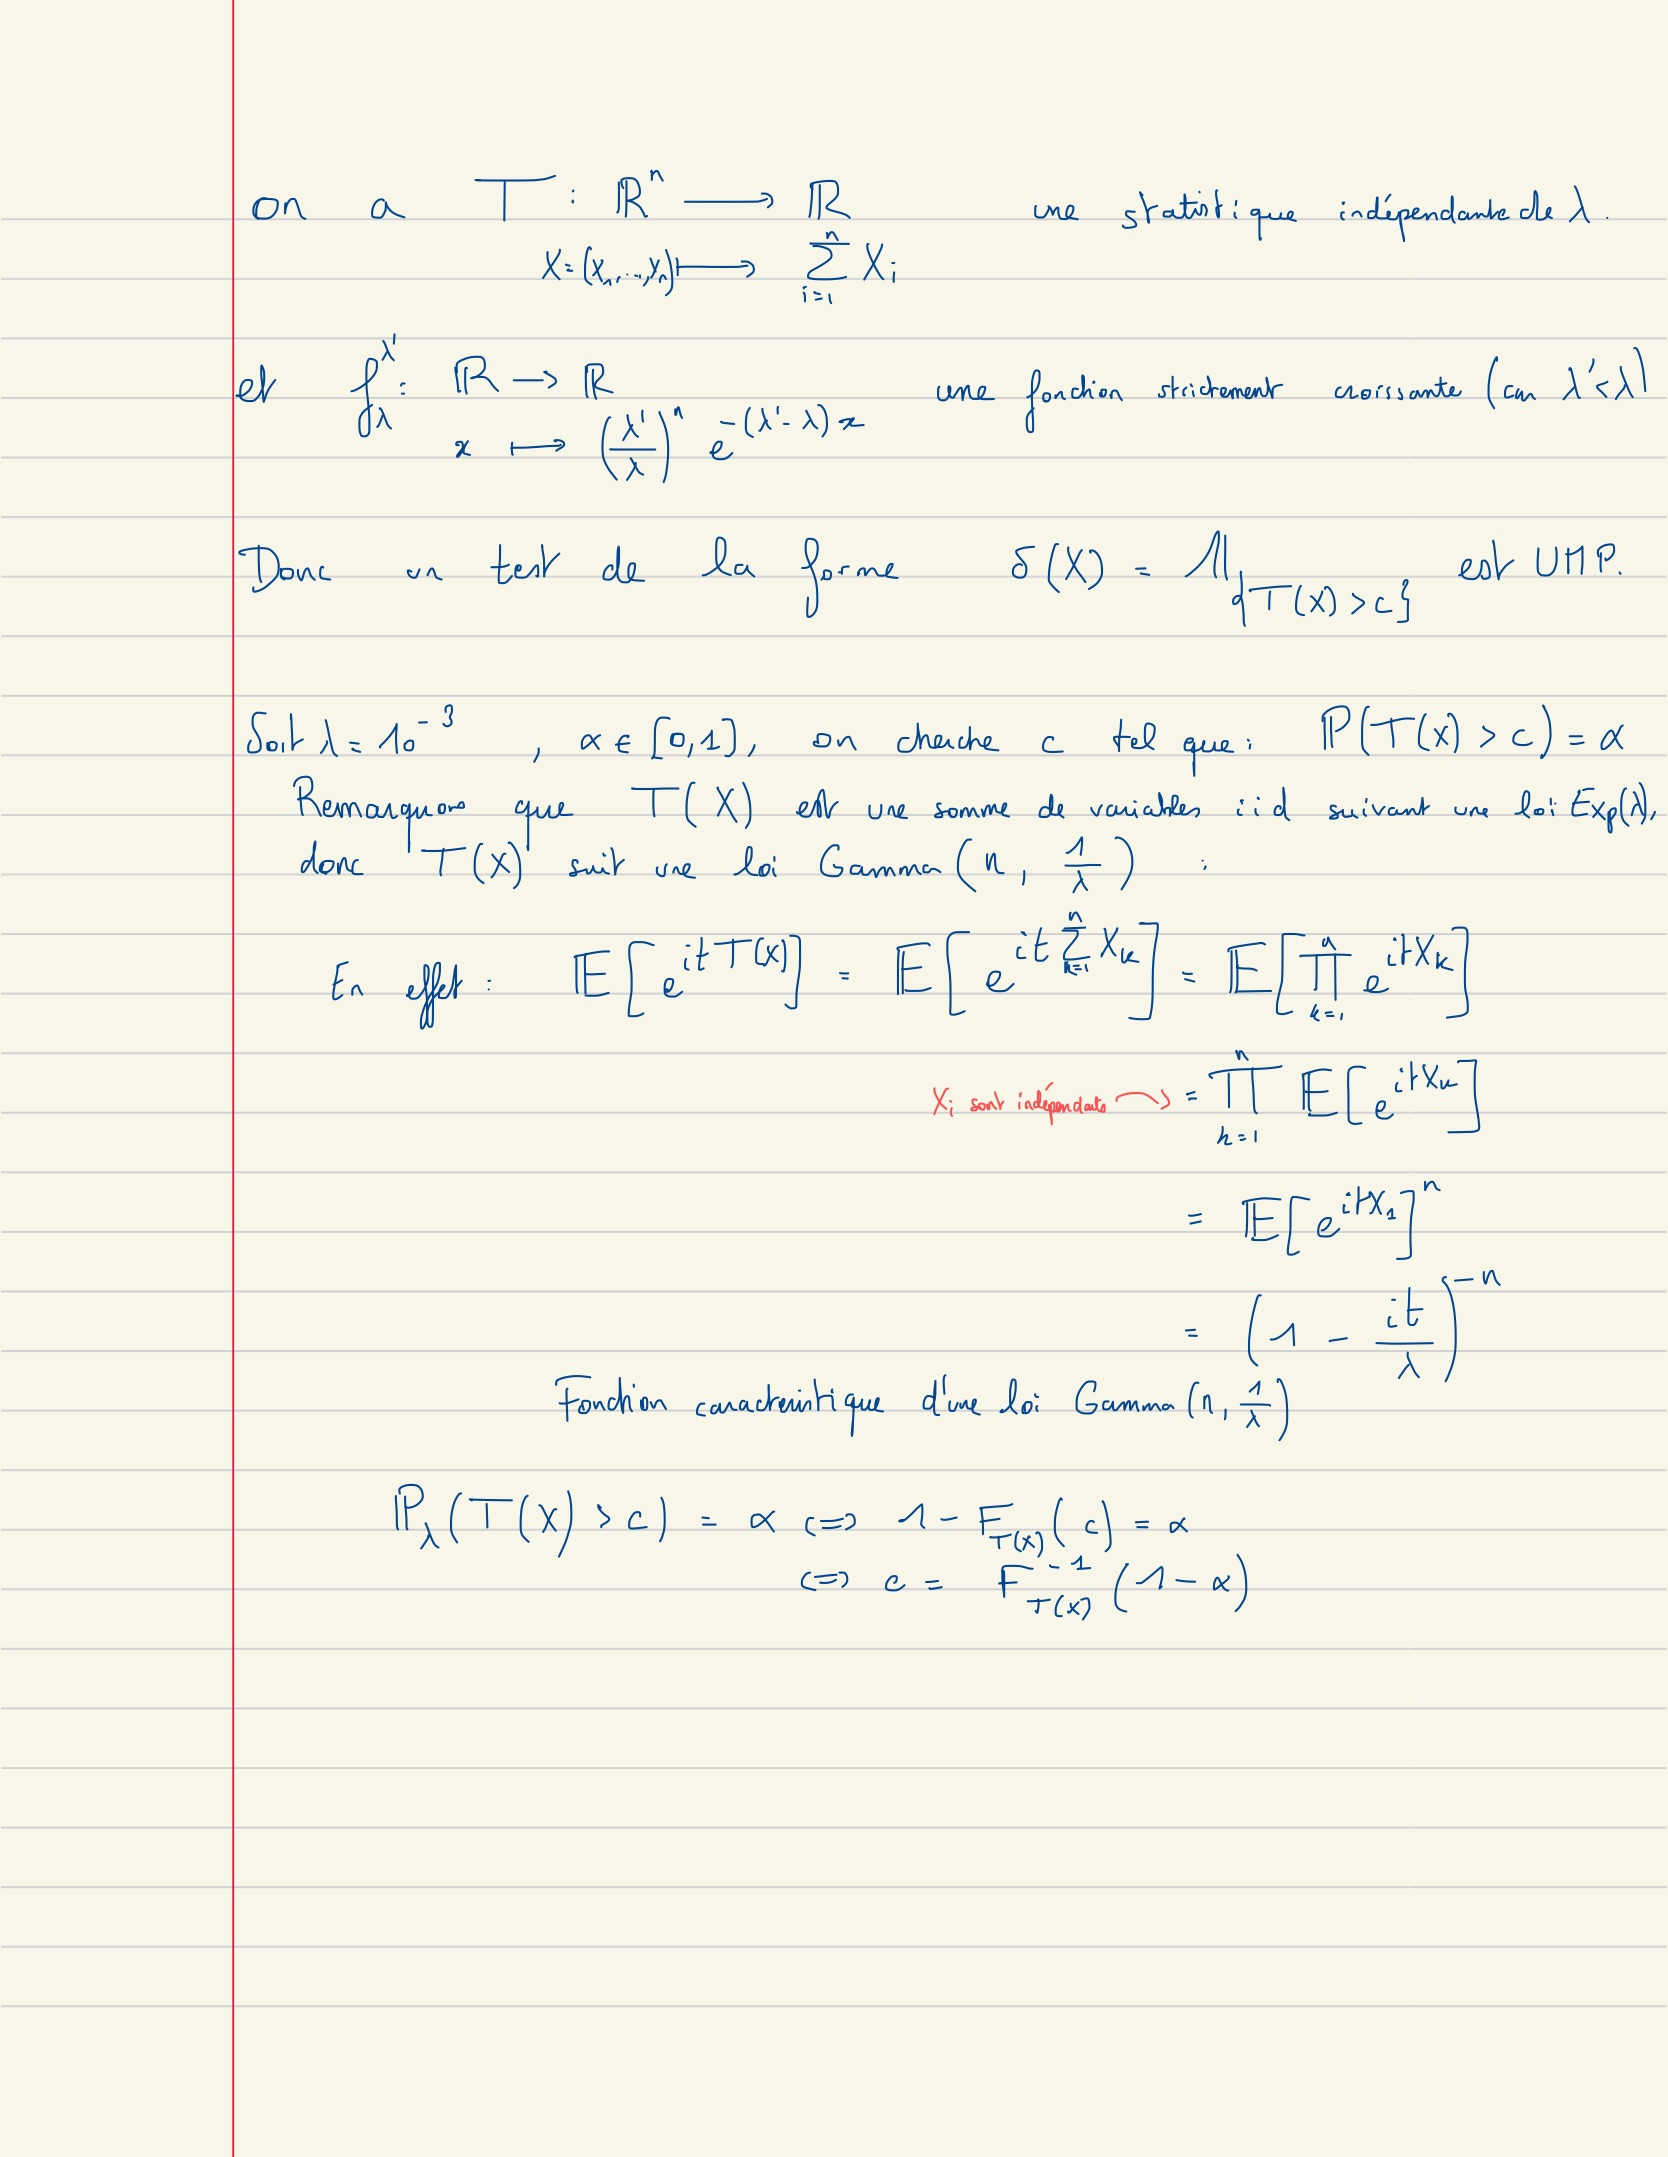

In [105]:
def test(X, c):
    return X > c

In [106]:
alpha = 0.05
lmda = 10**(-3)
n = len(costs)

c = stats.gamma.ppf(1 - alpha, n, scale=1/lmda) #fonction quantile

print(test(sum(costs), c))

False


Sur l'ensemble des observation, $\delta(X) = 0$, nous rejetons donc l'hypothèse alternative et acceptons l'hypothèse nulle :  
" Le cout moyen d'un accident est inférieur à un milliard de dollards ". La p-valeur correspond à la probabilité d'obtenir les valeurs extrêmes observées donc p-valeur $= P(T(X) > T(X_{obs}) | H_0) = 1 - F_{T(X)}(T(X_{obs}))$. On rappelle que $T(X)$ suit une loi $Gamma\left(n, \frac{1}{\lambda}\right)$ et ici on suppose $\lambda > 10^{-3}$.

In [192]:
T_obs = sum(costs)
n = len(costs)
lmda = 10**(-3)

p_val = 1 - stats.gamma.cdf(T_obs, n, scale=1/lmda)

print(p_val)

0.9862825135767351


La p-valeur est de 98% donc nous pouvons accorder une bonne confiance en notre test dans le cas où l'on accepte $H_0$.

c = 67740.08896417975


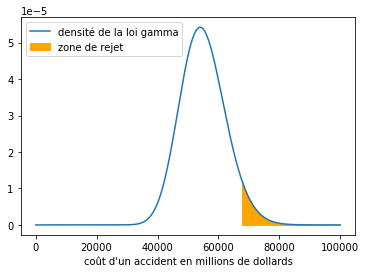

In [193]:
n = 55
lmda = 1/10**3
alpha = 0.05

c = stats.gamma.ppf(1-alpha, n, scale=1/lmda)

print("c = " + str(c))

num_points = 10**6

x = np.linspace(0, 10**5, num_points)

pdf_gamma= stats.gamma.pdf(x, n, scale=1/lmda)

 
plt.plot(x, pdf_gamma)

index = int(c / 10**5 * num_points) #indice de x correspondant environ à c. x[index] tend vers c lorsque num_points tend vers inf


plt.fill_between(x[index:], pdf_gamma[index:], color='orange', alpha=1)

plt.xlabel("coût d'un accident en millions de dollards")
plt.legend(["densité de la loi gamma","zone de rejet"])

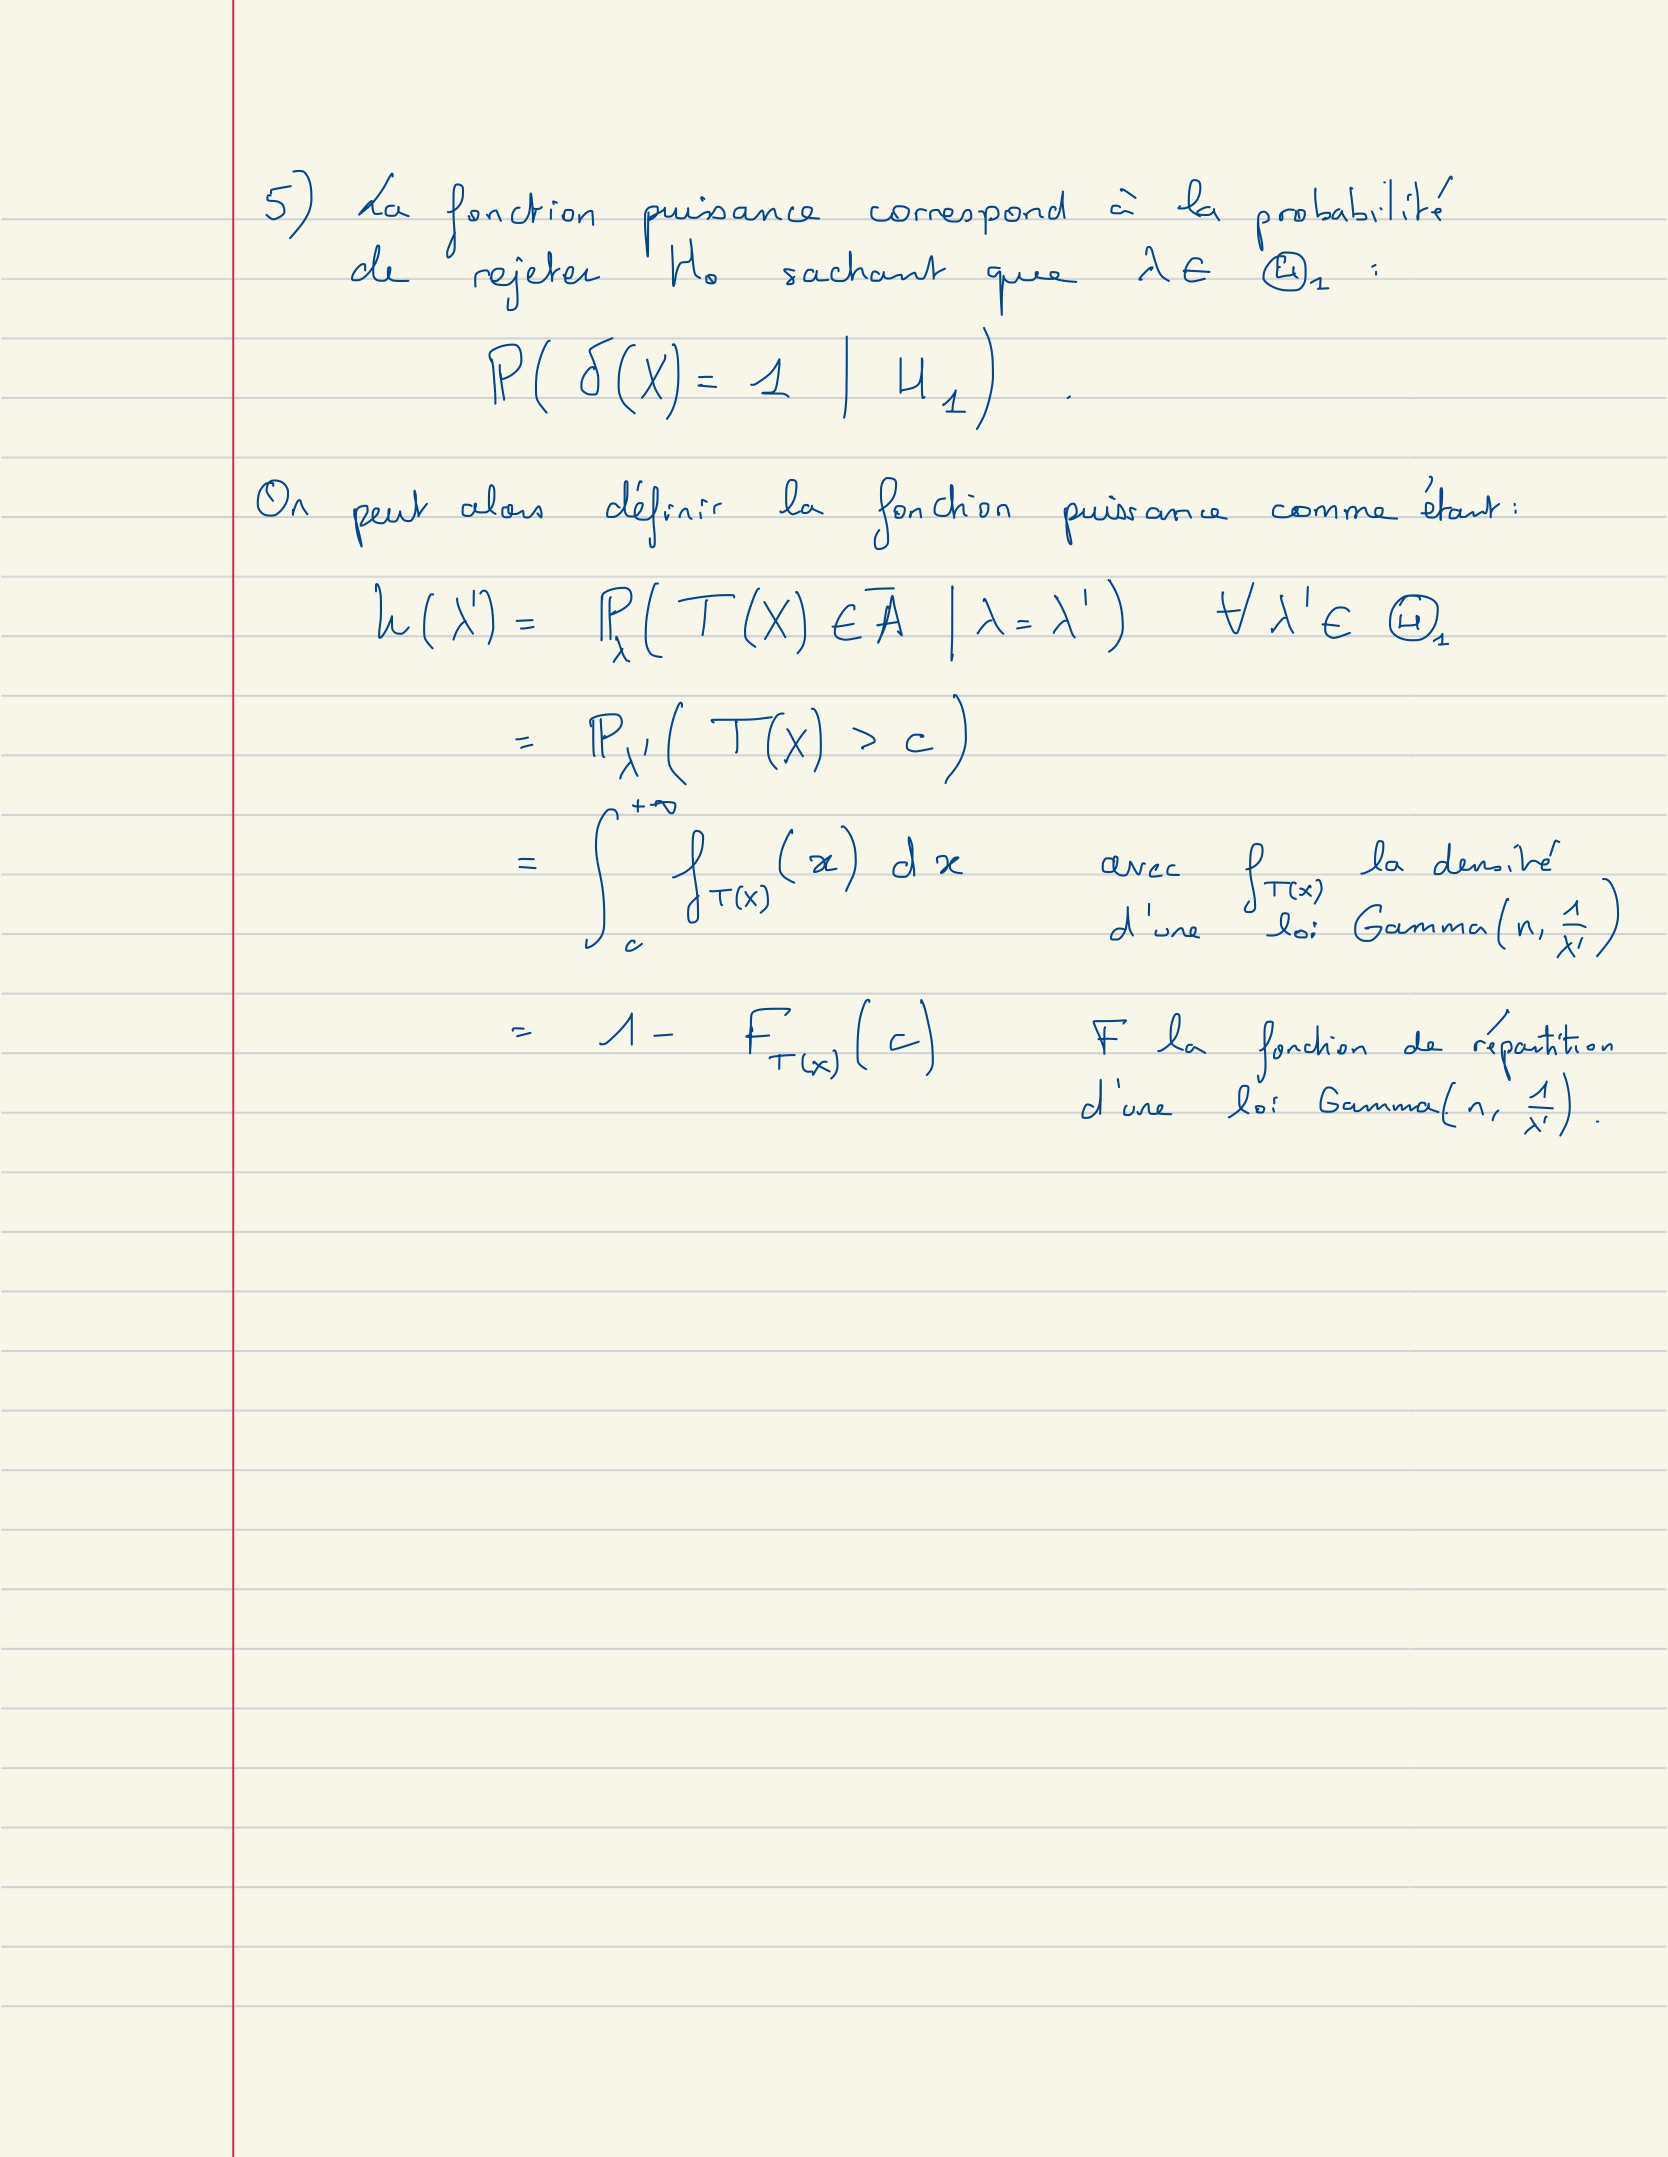

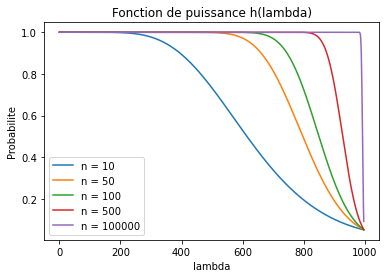

In [194]:
n1 = 10
n2 = 50
n3 = 100
n4 = 500
n5 = 100000

alpha = 0.05

c1 = stats.gamma.ppf(1-alpha, n1, scale=1/10**(-3))
c2 = stats.gamma.ppf(1-alpha, n2, scale=1/10**(-3))
c3 = stats.gamma.ppf(1-alpha, n3, scale=1/10**(-3))
c4 = stats.gamma.ppf(1-alpha, n4, scale=1/10**(-3))
c5 = stats.gamma.ppf(1-alpha, n5, scale=1/10**(-3))

lmda = np.linspace(0, 10**(-3), 1000)[1:-1]

h1 = 1 - stats.gamma.cdf(c1, n1, scale=1/lmda)
h2 = 1 - stats.gamma.cdf(c2, n2, scale=1/lmda)
h3 = 1 - stats.gamma.cdf(c3, n3, scale=1/lmda)
h4 = 1 - stats.gamma.cdf(c4, n4, scale=1/lmda)
h5 = 1 - stats.gamma.cdf(c5, n5, scale=1/lmda)

plt.plot(h1)
plt.plot(h2)
plt.plot(h3)
plt.plot(h4)
plt.plot(h5)

plt.title("Fonction de puissance h(lambda)")
plt.xlabel("lambda")
plt.ylabel("Probabilite")

plt.legend(["n = 10","n = 50","n = 100","n = 500","n = 100000"])

La puissance tend vers la fonction constante égale à 1 lorsque le nombre d'observation n tend vers l'infini. On en déduit donc que le risque d'accepter $H_0$ alors que $H_1$ est vraie réduit lorsque le nombre d'observations augmente.

En effet, pour des petits $n$ nous avons aussi une décroissance rapide de la puissance selon $\lambda$ qui se rapproche du $\lambda_{critique} = 10^{-3}.$ On a donc pour un faible nombre d'observations un risque important d'erreur dûe à notre test, qui pourrait nous dire que $\lambda > \lambda_{critique}$ alors que ce n'est pas le cas.

# 6)

c = 56644.85362695147


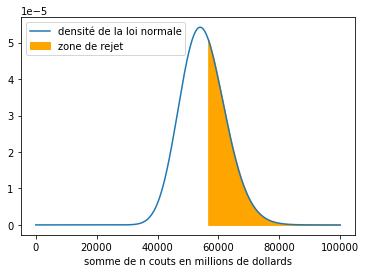

In [195]:
n = 55 #plus n est grand plus l'approximation sera correcte
lmda = 1/10**3
alpha = 0.05

c = stats.norm.ppf(1-alpha, loc = n/lmda, scale=1/lmda)

print("c = " + str(c))

num_points = 10**6

x = np.linspace(0, 10**5, num_points)

pdf_norm= stats.norm.pdf(x, loc = n / lmda, scale=1 / lmda)

plt.plot(x, pdf_gamma)

index = int(c / 10**5 * num_points) #indice de x correspondant environ à c. x[index] tend vers c lorsque num_points tend vers inf


plt.fill_between(x[index:], pdf_gamma[index:], color='orange')

plt.xlabel("somme de n couts en millions de dollards")
plt.legend(["densité de la loi normale","zone de rejet"])

In [196]:
alpha = 0.05
lmda = 10**(-3)
n = len(costs)

c = stats.norm.ppf(1-alpha, loc = n/lmda, scale=1/lmda) #fonction quantile

print(test(sum(costs), c))

False


A nouveau notre test rejette $H_1$ et accepte $H_0$.

In [198]:
T_obs = sum(costs)
n = len(costs)
lmda = 10**(-3)

p_val = 1 - stats.norm.cdf(T_obs, loc = n/lmda, scale=1/lmda)

print(p_val)

1.0


Nous avons une p-valeur encore plus satisfaisante.